## Productivity Prediction of Garment Employees

In this case, lets say you were manager in garment company. Top management demand you to evaluate worker performance and giving decision on how to suggest improvement, or other decisions

Question:
1. Based on techniques which you have learn in Artificial Inteligence class, use at least two techniques to process the data
2. Describe what decision and business action will you take?

Guidance:
* Don't forget to do Knowledge Data Discovery
* The result of your works is presented in .ppt format or other presentation format

About the dataset:

01 date : Date in MM-DD-YYYY\
02 day : Day of the Week\
03 quarter : A portion of the month. A month was divided into four quarters\
04 department : Associated department with the instance\
05 team_no : Associated team number with the instance\
06 no_of_workers : Number of workers in each team\
07 no_of_style_change : Number of changes in the style of a particular product\
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.\
09 smv : Standard Minute Value, it is the allocated time for a task\
10 wip : Work in progress. Includes the number of unfinished items for products\
11 over_time : Represents the amount of overtime by each team in minutes\
12 incentive : Represents the amount of financial incentive (in BDT/Bangladesh Taka) that enables or motivates a particular course of action.\
13 idle_time : The amount of time when the production was interrupted due to several reasons\
14 idle_men : The number of workers who were idle due to production interruption\
15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

The smallest unit in data is team, which perform daily task

Source: 
https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees/data

### 1. Data Load and Cleansing

In [1]:
# EDA Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Data Preprocessing and Model Training
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Run Experiment
import mlflow
import mlflow.sklearn
import mlflow.keras
from mlflow.models import infer_signature

# Utils
import warnings
import logging
from urllib.parse import urlparse

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
logging.basicConfig(level=logging.WARN)
os.chdir('/home/randi_eka/Artificial_Inteligence')

In [2]:
data_raw = pd.read_csv("UTS/garments_worker_productivity.csv")

In [3]:
data_raw.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [4]:
data_raw.shape

(1197, 15)

In [5]:
data_raw.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [6]:
data_raw['date'] = pd.to_datetime(data_raw['date'], format='%m/%d/%Y')
data_raw['team'] = data_raw['team'].astype(object)
data_raw['department'] = data_raw['department'].replace('finishing ', 'finishing')
data_raw['department'] = data_raw['department'].replace('sweing', 'sewing')

In [7]:
data_raw.head()

date   quarter department       day team  targeted_productivity  \
0 2015-01-01  Quarter1     sewing  Thursday    8                   0.80   
1 2015-01-01  Quarter1  finishing  Thursday    1                   0.75   
2 2015-01-01  Quarter1     sewing  Thursday   11                   0.80   
3 2015-01-01  Quarter1     sewing  Thursday   12                   0.80   
4 2015-01-01  Quarter1     sewing  Thursday    6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [8]:
data_raw.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

### 2. Descriptive Analysis

In [9]:
data_clean = data_raw

In [10]:
data_clean.describe(include='object')

quarter department        day  team
count       1197       1197       1197  1197
unique         5          2          6    12
top     Quarter1     sewing  Wednesday     8
freq         360        691        208   109

from the descriptive statistics of object variable:

1. More than half data filled with department sweing
2. Team that has most occurance is team 8

In [11]:
data_clean.describe(exclude=['object', 'datetime'])

targeted_productivity          smv           wip     over_time  \
count            1197.000000  1197.000000    691.000000   1197.000000   
mean                0.729632    15.062172   1190.465991   4567.460317   
std                 0.097891    10.943219   1837.455001   3348.823563   
min                 0.070000     2.900000      7.000000      0.000000   
25%                 0.700000     3.940000    774.500000   1440.000000   
50%                 0.750000    15.260000   1039.000000   3960.000000   
75%                 0.800000    24.260000   1252.500000   6960.000000   
max                 0.800000    54.560000  23122.000000  25920.000000   

         incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000         1197.000000   
mean     38.210526     0.730159     0.369256            0.150376   
std     160.182643    12.709757     3.268987            0.427848   
min       0.000000     0.000000     0.000000            0.000000   
25%       0.000000     0.000000     0.000000            0.000000   
50%       0.000000     0.000000     0.000000            0.000000   
75%      50.000000     0.000000     0.000000            0.000000   
max    3600.000000   300.000000    45.000000            2.000000   

       no_of_workers  actual_productivity  
count    1197.000000          1197.000000  
mean       34.609858             0.735091  
std        22.197687             0.174488  
min         2.000000             0.233705  
25%         9.000000             0.650307  
50%        34.000000             0.773333  
75%        57.000000             0.850253  
max        89.000000             1.120437

from the descriptive statistics of numerical variables:

1. Average of targeted_productivity reach 0.73, which mean, not all target should be 1, <b>with minimum target of 7%.</b>  
2. Standard Minute Value(SMV) were ranging from 2.9 up to 54.56 minutes, with mean of 15.06 minutes, which mean many tasks require 2.9 to 15.06 minutes to finished. This can be further classified to determine which task is more critical, since task with longer time to finish were more likely become the bottle neck.
3. Work in Progress (WIP) ranging from 7 to 23122. More WIP could translate to which team need more workforce. 
4. Incentive spaning over 0 to 3600 BDT, with average of 38.2 BDT
5. Idle_time and idle_men mostly related with production interruption, thus further analysis can be made to determine which task need more maintenance priorization.
6. The average number of workers per team is 34, ranging from 2 to 89 workforce.
7. Actual_productivity averaging in 0.73 within 0.17 to 1.12. Based on column description, it should be ranging from 0 to 1, when productivity exceed this threshold, it can either removed or further investigate.

Based on analysis, task with high SMV, high WIP, high overtime, and high incentive can be prioritized to balancing the work load. Task with many idle_time and idle_men can be prioritized for maintenance. Furthermore, actual_productivity cannot fully determine if the tasks were already performed of not, since the minimum of target productivity reach 7%, I think we better calculate the gap between actual_productivity and targeted_productivity to better understand which tasks has already performed well.

### 3. Diagnostic Analysis

3.1. What's the difference between null and non null WIP? \
3.2. Feature Engineering \
a. Sewing Department \
b. Finishing Department

#### 3.1. What's the difference between null and non null WIP?

In [12]:
data_wp_not_null = data_clean[data_clean['wip'].notna()]
data_wp_not_null

date   quarter department        day team  targeted_productivity  \
0    2015-01-01  Quarter1     sewing   Thursday    8                   0.80   
2    2015-01-01  Quarter1     sewing   Thursday   11                   0.80   
3    2015-01-01  Quarter1     sewing   Thursday   12                   0.80   
4    2015-01-01  Quarter1     sewing   Thursday    6                   0.80   
5    2015-01-01  Quarter1     sewing   Thursday    7                   0.80   
7    2015-01-01  Quarter1     sewing   Thursday    3                   0.75   
8    2015-01-01  Quarter1     sewing   Thursday    2                   0.75   
9    2015-01-01  Quarter1     sewing   Thursday    1                   0.75   
10   2015-01-01  Quarter1     sewing   Thursday    9                   0.70   
11   2015-01-01  Quarter1     sewing   Thursday   10                   0.75   
12   2015-01-01  Quarter1     sewing   Thursday    5                   0.80   
17   2015-01-01  Quarter1     sewing   Thursday    4                   0.65   
24   2015-01-03  Quarter1     sewing   Saturday    1                   0.80   
25   2015-01-03  Quarter1     sewing   Saturday    3                   0.80   
26   2015-01-03  Quarter1     sewing   Saturday    8                   0.80   
27   2015-01-03  Quarter1     sewing   Saturday   12                   0.80   
28   2015-01-03  Quarter1     sewing   Saturday   11                   0.80   
29   2015-01-03  Quarter1     sewing   Saturday    5                   0.80   
30   2015-01-03  Quarter1     sewing   Saturday    6                   0.80   
31   2015-01-03  Quarter1     sewing   Saturday    7                   0.80   
32   2015-01-03  Quarter1     sewing   Saturday   10                   0.75   
34   2015-01-03  Quarter1     sewing   Saturday    2                   0.75   
36   2015-01-03  Quarter1     sewing   Saturday    4                   0.70   
37   2015-01-03  Quarter1     sewing   Saturday    9                   0.70   
43   2015-01-04  Quarter1     sewing     Sunday    6                   0.80   
45   2015-01-04  Quarter1     sewing     Sunday    9                   0.80   
46   2015-01-04  Quarter1     sewing     Sunday    7                   0.80   
47   2015-01-04  Quarter1     sewing     Sunday    8                   0.80   
48   2015-01-04  Quarter1     sewing     Sunday    4                   0.80   
49   2015-01-04  Quarter1     sewing     Sunday    1                   0.80   
50   2015-01-04  Quarter1     sewing     Sunday    2                   0.80   
51   2015-01-04  Quarter1     sewing     Sunday   12                   0.80   
54   2015-01-04  Quarter1     sewing     Sunday   11                   0.75   
55   2015-01-04  Quarter1     sewing     Sunday    3                   0.75   
56   2015-01-04  Quarter1     sewing     Sunday   10                   0.70   
59   2015-01-04  Quarter1     sewing     Sunday    5                   0.70   
65   2015-01-05  Quarter1     sewing     Monday    9                   0.80   
68   2015-01-05  Quarter1     sewing     Monday    7                   0.80   
69   2015-01-05  Quarter1     sewing     Monday    8                   0.80   
70   2015-01-05  Quarter1     sewing     Monday    1                   0.80   
71   2015-01-05  Quarter1     sewing     Monday   11                   0.80   
72   2015-01-05  Quarter1     sewing     Monday    6                   0.80   
73   2015-01-05  Quarter1     sewing     Monday   12                   0.80   
74   2015-01-05  Quarter1     sewing     Monday    2                   0.80   
75   2015-01-05  Quarter1     sewing     Monday    4                   0.80   
78   2015-01-05  Quarter1     sewing     Monday   10                   0.75   
79   2015-01-05  Quarter1     sewing     Monday    3                   0.75   
82   2015-01-05  Quarter1     sewing     Monday    5                   0.60   
88   2015-01-06  Quarter1     sewing    Tuesday    1                   0.80   
89   2015-01-06  Quarter1     sewing    Tuesday    9         

In [13]:
data_wp_not_null.describe(include=['object'])

quarter department        day  team
count        691        691        691   691
unique         5          1          6    12
top     Quarter1     sewing  Wednesday    11
freq         211        691        119    59

In [14]:
data_wp_not_null.describe(exclude=['object', 'datetime'])

targeted_productivity         smv           wip     over_time  \
count             691.000000  691.000000    691.000000    691.000000   
mean                0.723980   23.245412   1190.465991   6508.205499   
std                 0.102006    6.976497   1837.455001   2864.505604   
min                 0.070000   10.050000      7.000000      0.000000   
25%                 0.700000   18.790000    774.500000   4560.000000   
50%                 0.750000   22.520000   1039.000000   6840.000000   
75%                 0.800000   28.080000   1252.500000   7200.000000   
max                 0.800000   54.560000  23122.000000  25920.000000   

        incentive   idle_time    idle_men  no_of_style_change  no_of_workers  \
count  691.000000  691.000000  691.000000          691.000000     691.000000   
mean    44.483357    1.264834    0.639653            0.260492      52.445731   
std     27.596591   16.712923    4.283652            0.537185       9.417353   
min      0.000000    0.000000    0.000000            0.000000      26.000000   
25%     30.000000    0.000000    0.000000            0.000000      52.000000   
50%     45.000000    0.000000    0.000000            0.000000      57.000000   
75%     60.000000    0.000000    0.000000            0.000000      58.000000   
max    138.000000  300.000000   45.000000            2.000000      89.000000   

       actual_productivity  
count           691.000000  
mean              0.722013  
std               0.154784  
min               0.233705  
25%               0.661470  
50%               0.750608  
75%               0.800402  
max               1.100484

In [15]:
data_wp_null = data_clean[data_clean['wip'].isna()]
data_wp_null

date   quarter department        day team  targeted_productivity  \
1    2015-01-01  Quarter1  finishing   Thursday    1                   0.75   
6    2015-01-01  Quarter1  finishing   Thursday    2                   0.75   
13   2015-01-01  Quarter1  finishing   Thursday   10                   0.65   
14   2015-01-01  Quarter1  finishing   Thursday    8                   0.75   
15   2015-01-01  Quarter1  finishing   Thursday    4                   0.75   
16   2015-01-01  Quarter1  finishing   Thursday    7                   0.80   
18   2015-01-01  Quarter1  finishing   Thursday   11                   0.70   
19   2015-01-03  Quarter1  finishing   Saturday    4                   0.80   
20   2015-01-03  Quarter1  finishing   Saturday   11                   0.75   
21   2015-01-03  Quarter1  finishing   Saturday    9                   0.80   
22   2015-01-03  Quarter1  finishing   Saturday    3                   0.75   
23   2015-01-03  Quarter1  finishing   Saturday    1                   0.80   
33   2015-01-03  Quarter1  finishing   Saturday    2                   0.80   
35   2015-01-03  Quarter1  finishing   Saturday   10                   0.70   
38   2015-01-03  Quarter1  finishing   Saturday    8                   0.80   
39   2015-01-03  Quarter1  finishing   Saturday    7                   0.80   
40   2015-01-04  Quarter1  finishing     Sunday    3                   0.75   
41   2015-01-04  Quarter1  finishing     Sunday    9                   0.80   
42   2015-01-04  Quarter1  finishing     Sunday    1                   0.80   
44   2015-01-04  Quarter1  finishing     Sunday    4                   0.80   
52   2015-01-04  Quarter1  finishing     Sunday    2                   0.80   
53   2015-01-04  Quarter1  finishing     Sunday   10                   0.70   
57   2015-01-04  Quarter1  finishing     Sunday    8                   0.80   
58   2015-01-04  Quarter1  finishing     Sunday    7                   0.80   
60   2015-01-04  Quarter1  finishing     Sunday   11                   0.75   
61   2015-01-05  Quarter1  finishing     Monday    1                   0.80   
62   2015-01-05  Quarter1  finishing     Monday   11                   0.80   
63   2015-01-05  Quarter1  finishing     Monday    4                   0.80   
64   2015-01-05  Quarter1  finishing     Monday    3                   0.75   
66   2015-01-05  Quarter1  finishing     Monday    9                   0.80   
67   2015-01-05  Quarter1  finishing     Monday    2                   0.80   
76   2015-01-05  Quarter1  finishing     Monday   10                   0.75   
77   2015-01-05  Quarter1  finishing     Monday    5                   0.60   
80   2015-01-05  Quarter1  finishing     Monday    7                   0.80   
81   2015-01-05  Quarter1  finishing     Monday    8                   0.80   
83   2015-01-06  Quarter1  finishing    Tuesday    4                   0.80   
84   2015-01-06  Quarter1  finishing    Tuesday    1                   0.80   
85   2015-01-06  Quarter1  finishing    Tuesday    3                   0.75   
86   2015-01-06  Quarter1  finishing    Tuesday   11                   0.80   
87   2015-01-06  Quarter1  finishing    Tuesday    9                   0.80   
90   2015-01-06  Quarter1  finishing    Tuesday   10                   0.75   
91   2015-01-06  Quarter1  finishing    Tuesday    2                   0.80   
101  2015-01-06  Quarter1  finishing    Tuesday    8                   0.80   
103  2015-01-06  Quarter1  finishing    Tuesday    7                   0.80   
104  2015-01-07  Quarter1  finishing  Wednesday    1                   0.80   
105  2015-01-07  Quarter1  finishing  Wednesday    9                   0.80   
109  2015-01-07  Quarter1  finishing  Wednesday    3                   0.75   
110  2015-01-07  Quarter1  finishing  Wednesday    4                   0.80   
111  2015-01-07  Quarter1  finishing  Wednesday    2                   0.80   
112  2015-01-07  Quarter1  finishing  Wednesday   10         

In [16]:
data_wp_null.describe(include=['object'])

quarter department        day  team
count        506        506        506   506
unique         5          1          6    12
top     Quarter1  finishing  Wednesday     8
freq         149        506         89    53

In [17]:
data_wp_null.describe(exclude=['object', 'datetime'])

targeted_productivity         smv  wip     over_time    incentive  \
count             506.000000  506.000000  0.0    506.000000   506.000000   
mean                0.737352    3.887036  NaN   1917.154150    29.644269   
std                 0.091512    0.594110  NaN   1776.698408   244.130042   
min                 0.350000    2.900000  NaN      0.000000     0.000000   
25%                 0.700000    3.900000  NaN    960.000000     0.000000   
50%                 0.750000    3.940000  NaN   1440.000000     0.000000   
75%                 0.800000    4.150000  NaN   1920.000000     0.000000   
max                 0.800000    5.130000  NaN  15000.000000  3600.000000   

       idle_time  idle_men  no_of_style_change  no_of_workers  \
count      506.0     506.0               506.0     506.000000   
mean         0.0       0.0                 0.0      10.252964   
std          0.0       0.0                 0.0       4.007819   
min          0.0       0.0                 0.0       2.000000   
25%          0.0       0.0                 0.0       8.000000   
50%          0.0       0.0                 0.0       8.000000   
75%          0.0       0.0                 0.0      11.750000   
max          0.0       0.0                 0.0      28.000000   

       actual_productivity  
count           506.000000  
mean              0.752951  
std               0.197021  
min               0.235795  
25%               0.631606  
50%               0.805909  
75%               0.906364  
max               1.120437

From the descriptive statistics:

1. WIP only exist in department sweing
2. The mean of SMV is significantly different (3.8 vs 23.2)
3. The mean of overtime is significantly different (1917.2 vs 6508.2)
4. Department sweing doesn't encounter distrubing event, thus doesnt have idle_time, idle_man, and no_of_style_change

From the analysis, it could be assumed that different department has different characteristics regarding SMV, WIP, overtime, and disruption occurance. Thus, further analysis can be made differently for each departments.

#### 3.2. Feature Engineering

In [18]:
data_sewing = data_wp_not_null
data_finishing = data_wp_null

#### a. Sewing Department

In [19]:
data_sewing['gap_productivity'] = data_sewing['actual_productivity'] - data_sewing['targeted_productivity']
data_sewing['gap_productivity'].describe()

/tmp/ipykernel_12635/225935232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sewing['gap_productivity'] = data_sewing['actual_productivity'] - data_sewing['targeted_productivity']


count    691.000000
mean      -0.001967
std        0.111009
min       -0.492499
25%        0.000095
50%        0.000402
75%        0.050025
max        0.452845
Name: gap_productivity, dtype: float64

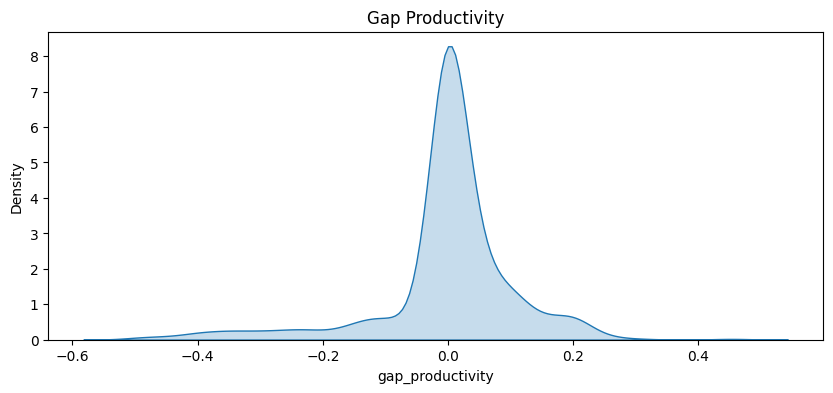

In [20]:
plt.figure(figsize=(10,4))
sns.kdeplot(data_sewing['gap_productivity'], fill=True)
plt.title('Gap Productivity')
plt.show()

Based on the descriptive statistics and density plot:

1. Negative value of gap_productivity means that actual productivity hasn't achieve targeted productivity
2. The mean of gap productivity is around -0.001967 and seems to follow normal distribution, this means that most of productivities are either achieved, slightly not achieved, or slightly over achieved
3. The value were ranging from -0.492 to 0.45  

Based on the analysis, further classification on gap_productivity can be made as defined below: 
* Less than -0.05 : Underperform 
* -0.05 to 0.05   : On Target 
* More than 0.05  : Perform 

In [21]:
def categorize_gap(value):
    if value < -0.05:
        return 'Underperform'
    elif -0.05 <= value <= 0.05:
        return 'On Target'
    else:
        return 'Perform'

data_sewing['gap_category'] = data_sewing['gap_productivity'].apply(categorize_gap)

/tmp/ipykernel_12635/3292935108.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sewing['gap_category'] = data_sewing['gap_productivity'].apply(categorize_gap)


Let's further analyze gap_category that is underperform

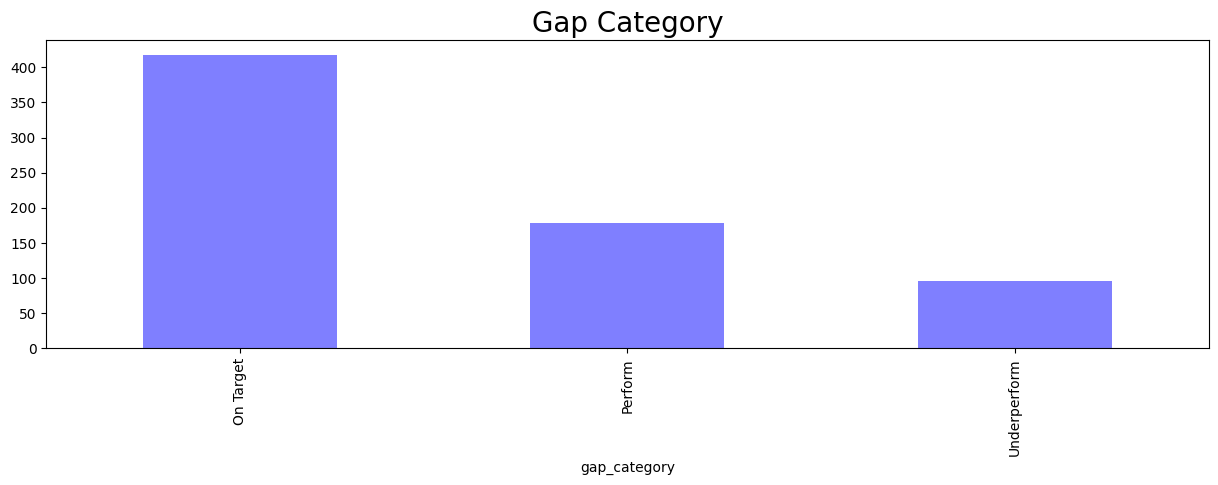

In [22]:
plt.figure(figsize=(15,4))
    
# Calculate value counts and sort by descending order
value_counts = data_sewing['gap_category'].value_counts().sort_values(ascending=False)

# Create bar chart
value_counts.plot(kind='bar', color='blue', alpha=0.5)

plt.title("Gap Category", fontdict={'fontsize': 20})
plt.show()

In [23]:
data_sewing_vu = data_sewing[data_sewing['gap_category']=='Underperform']
data_sewing_vu = data_sewing_vu.drop('gap_productivity', axis=1)
data_sewing_vu.head()

date   quarter department        day team  targeted_productivity  \
12  2015-01-01  Quarter1     sewing   Thursday    5                   0.80   
17  2015-01-01  Quarter1     sewing   Thursday    4                   0.65   
59  2015-01-04  Quarter1     sewing     Sunday    5                   0.70   
124 2015-01-07  Quarter1     sewing  Wednesday   11                   0.80   
147 2015-01-08  Quarter2     sewing   Thursday    5                   0.70   

       smv    wip  over_time  incentive  idle_time  idle_men  \
12   11.41  668.0       3660         50        0.0         0   
17   23.69  861.0       7200          0        0.0         0   
59   45.67  884.0       6960         26        0.0         0   
124  31.83  568.0       9900         40        0.0         0   
147  42.41  724.0      10260          0        0.0         0   

     no_of_style_change  no_of_workers  actual_productivity  gap_category  
12                    0           30.5             0.707046  Underperform  
17                    0           60.0             0.521180  Underperform  
59                    0           58.0             0.603432  Underperform  
124                   0           55.0             0.412120  Underperform  
147                   0           57.0             0.233705  Underperform

In [24]:
data_sewing_vu.count()

date                     95
quarter                  95
department               95
day                      95
team                     95
targeted_productivity    95
smv                      95
wip                      95
over_time                95
incentive                95
idle_time                95
idle_men                 95
no_of_style_change       95
no_of_workers            95
actual_productivity      95
gap_category             95
dtype: int64

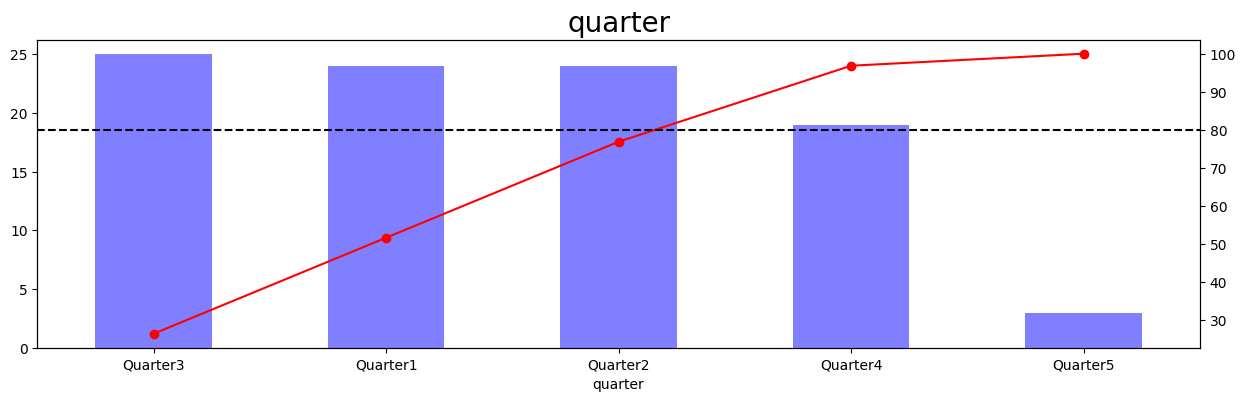

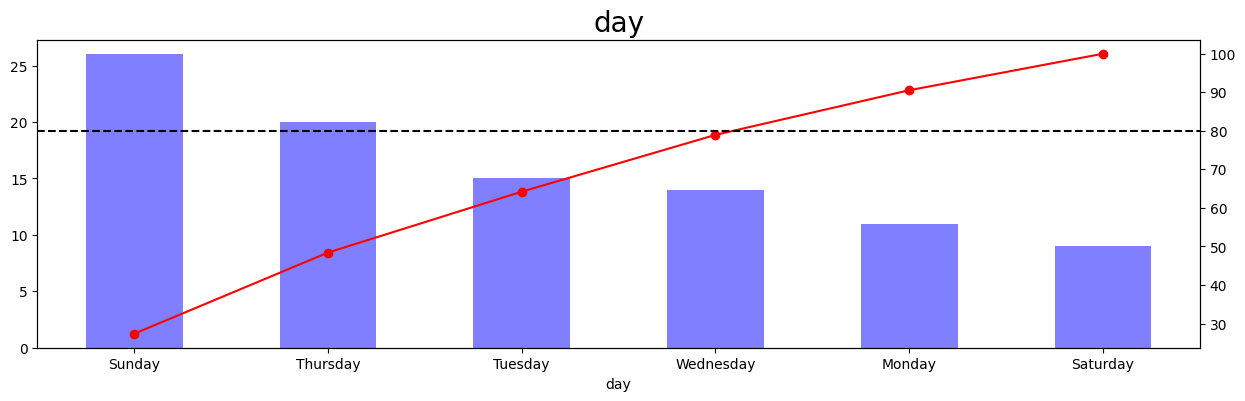

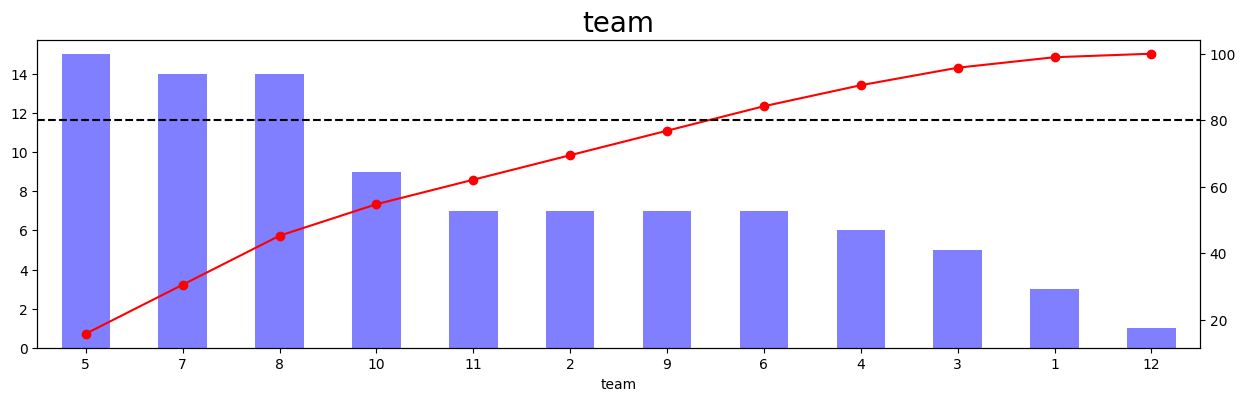

In [25]:
#Draw Bar Chart for Object Columns
data_cat = data_sewing_vu[['quarter','day', 'team']]
data_cat.head()

for column in data_cat:
    plt.figure(figsize=(15,4))
    
    # Calculate value counts and sort by descending order
    value_counts = data_cat[column].value_counts().sort_values(ascending=False)
    
    # Create bar chart
    value_counts.plot(kind='bar', color='blue', alpha=0.5)
    
    # Calculate cumulative sums and convert to percentage of total
    cumulative_sums = value_counts.cumsum() / value_counts.sum() * 100
    
    # Create Pareto line
    cumulative_sums.plot(kind='line', marker='o', color='red', secondary_y=True)

    # Add dotted line at 80%
    plt.axhline(y=80, color='k', linestyle='--')
    
    plt.title(column, fontdict={'fontsize': 20})
    plt.show()


From the bar chart, the "underperform" and "very underperform" condition for sewing department were:

1. 80% happen during Quarter 1 to 3 
2. 80% happen during Sunday, Tuesday, Wednesday, and Thursday
3. Team no 5,7,8 were team that suffer underperformance the most

In [26]:
#Draw Box Plot for Numeric Columns
data_num = data_sewing_vu[['team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity']]

columns = ['smv','wip','over_time', 'idle_time', 'idle_men', 'no_of_style_change']

teams_to_plot = [5,7,8]

for team in data_num['team'].unique():
    if team in teams_to_plot:
        team_data = data_num[data_num['team'] == team]
        fig = make_subplots(rows=len(columns), subplot_titles=columns)
        
        for i, column in enumerate(columns):
            fig.add_trace(go.Histogram(x=team_data[column], name=column, nbinsx=10), row=i+1, col=1)
        
        fig.update_layout(height=400*len(columns), width=1000, title_text=f'Distribution plots of team {team}')
        fig.show()


Based on the analysis,

<b>Team 5 has</b>:
- Consist of 15 tasks
- The SMV mostly in range of 20 minutes to 34.7 minutes
- WIP around 400 to 1390
- Often took over_time
- Rarely encounter idle_time, idle_time, and no_of_style_change

Based on this, team 5 more likely need more workforce to reduce WIP for quite a long tasks (compared to finishing dept) at least for Quarter 1 to 3, during Sunday, Tuesday, Wednesday, and Thursday.

<b>Team 7 has</b>:
- Consist of 14 tasks
- WIP around 500 to 2990
- The SMV mostly in range of 20 minutes to 34.9 minutes
- Often took over_time from 6000-7900 minutes
- Sometime encounter idle_time, idle_men, and no_of_style_change

Based on this, team 7 more likely need more workforce to reduce WIP for quite a long tasks (compared to finishing dept) at least for Quarter 1 to 3, during Sunday, Tuesday, Wednesday, and Thursday. Also it needs attention for maintenance and reduce the no_of_style_change.

<b>Team 8 has</b>:
- Consist of 14 tasks
- WIP around 200 to 1599
- The SMV mostly in range of 24.26 minutes to 30.1 minutes
- Often took overtime around 6000 to 6990 minutes
- Rarely encounter idle_time, idle_men, with several no_of_style_change

Based on this, team 8 more likely need more workforce to reduce WIP for quite a long tasks (compared to finishing dept) at least for Quarter 1 to 3, during Sunday, Tuesday, Wednesday, and Thursday. Also it needs attention for maintenance and reduce the no_of_style_change.

Note: 
1. In total, there is only 95 out of 691 tasks showing underperformed tasks for sewing department, thus this analysis should be confirmed with PIC for each teams.


#### b. Finishing Department

In [27]:
data_finishing['gap_productivity'] = data_finishing['actual_productivity'] - data_finishing['targeted_productivity']
data_finishing['gap_productivity'].describe()

/tmp/ipykernel_12635/3449569633.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    506.000000
mean       0.015599
std        0.208987
min       -0.561958
25%       -0.121681
50%        0.052033
75%        0.154641
max        0.644375
Name: gap_productivity, dtype: float64

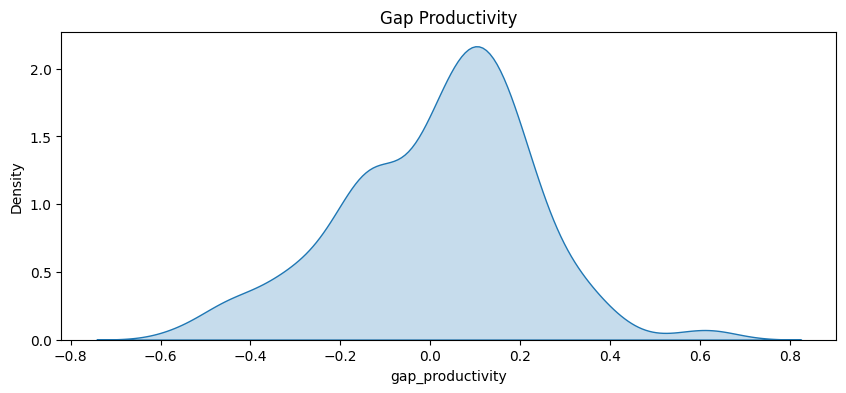

In [28]:
plt.figure(figsize=(10,4))
sns.kdeplot(data_finishing['gap_productivity'], fill=True)
plt.title('Gap Productivity')
plt.show()

Based on the descriptive statistics and density plot:

1. Negative value of gap_productivity means that actual productivity hasn't achieve targeted productivity
2. The mean of gap productivity is around 0.015599 and seems to follow normal distribution, this means that most of productivities are either achieved, slightly not achieved, or slightly over achieved
3. The value were ranging from -0.561958 to 0.644375  

Based on the analysis, further classification on gap_productivity can be made as defined below: 
* Less than -0.05 : Underperform 
* -0.05 to 0.05 : On Target 
* More than 0.05 : Perform 


In [29]:
data_finishing['gap_category'] = data_finishing['gap_productivity'].apply(categorize_gap)

/tmp/ipykernel_12635/2866190084.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Let's further analyze gap_category that is underperform and very underperform

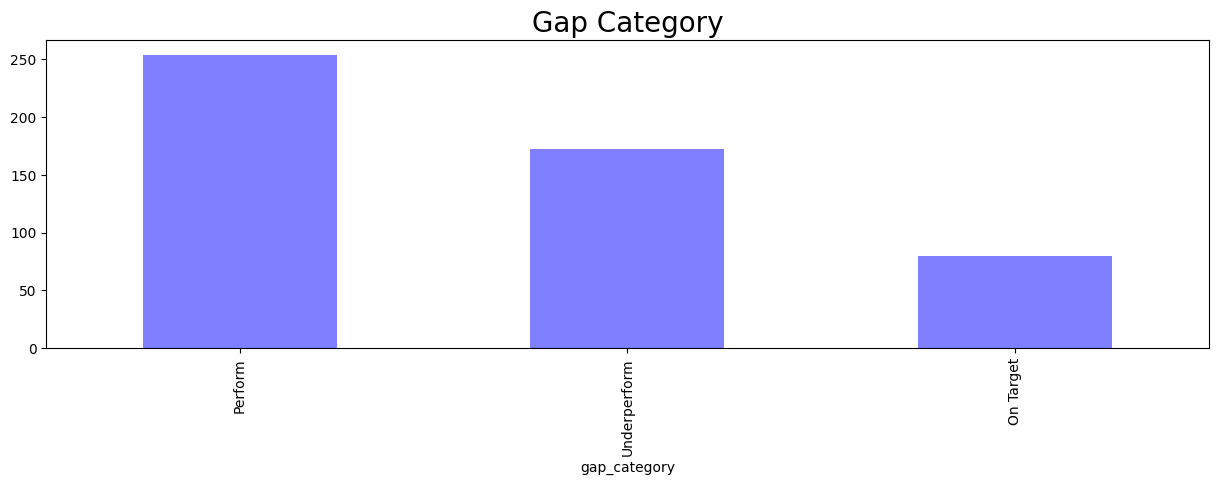

In [30]:
plt.figure(figsize=(15,4))
    
# Calculate value counts and sort by descending order
value_counts = data_finishing['gap_category'].value_counts().sort_values(ascending=False)

# Create bar chart
value_counts.plot(kind='bar', color='blue', alpha=0.5)

plt.title("Gap Category", fontdict={'fontsize': 20})
plt.show()

In [31]:
data_finishing_vu = data_finishing[data_finishing['gap_category']=='Underperform']
data_finishing_vu = data_finishing_vu.drop('gap_productivity', axis=1)
data_finishing_vu.head()

date   quarter department       day team  targeted_productivity  \
14 2015-01-01  Quarter1  finishing  Thursday    8                   0.75   
15 2015-01-01  Quarter1  finishing  Thursday    4                   0.75   
16 2015-01-01  Quarter1  finishing  Thursday    7                   0.80   
18 2015-01-01  Quarter1  finishing  Thursday   11                   0.70   
38 2015-01-03  Quarter1  finishing  Saturday    8                   0.80   

     smv  wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
14  2.90  NaN        960          0        0.0         0                   0   
15  3.94  NaN       2160          0        0.0         0                   0   
16  2.90  NaN        960          0        0.0         0                   0   
18  4.15  NaN       1440          0        0.0         0                   0   
38  2.90  NaN        960          0        0.0         0                   0   

    no_of_workers  actual_productivity  gap_category  
14            8.0             0.676667  Underperform  
15           18.0             0.593056  Underperform  
16            8.0             0.540729  Underperform  
18           12.0             0.436326  Underperform  
38            8.0             0.628333  Underperform

In [32]:
data_finishing_vu.count()

date                     172
quarter                  172
department               172
day                      172
team                     172
targeted_productivity    172
smv                      172
wip                        0
over_time                172
incentive                172
idle_time                172
idle_men                 172
no_of_style_change       172
no_of_workers            172
actual_productivity      172
gap_category             172
dtype: int64

In [33]:
data_finishing_vu = data_finishing_vu.drop("wip", axis=1)

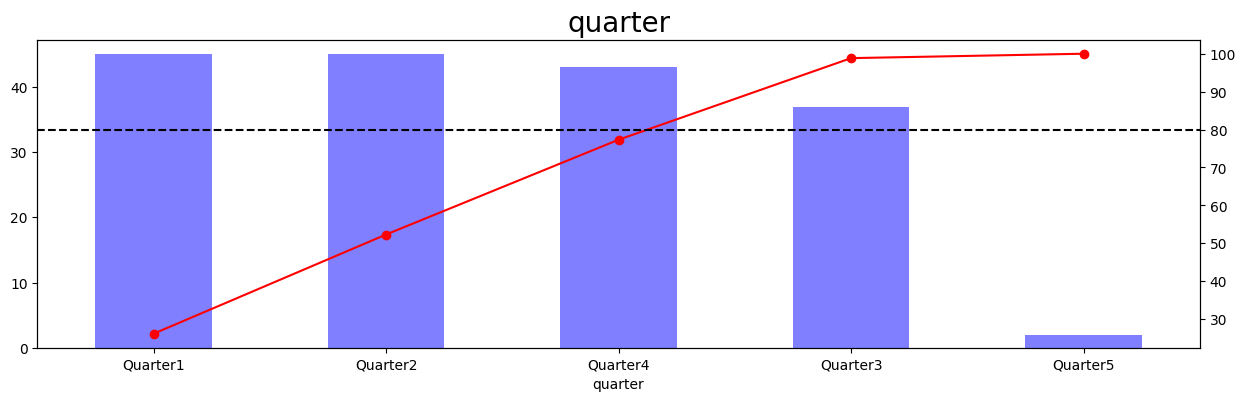

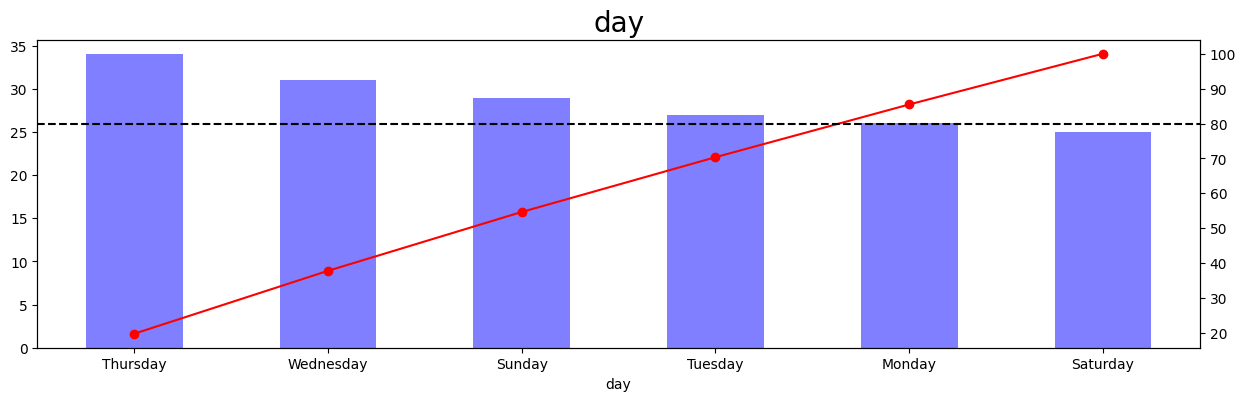

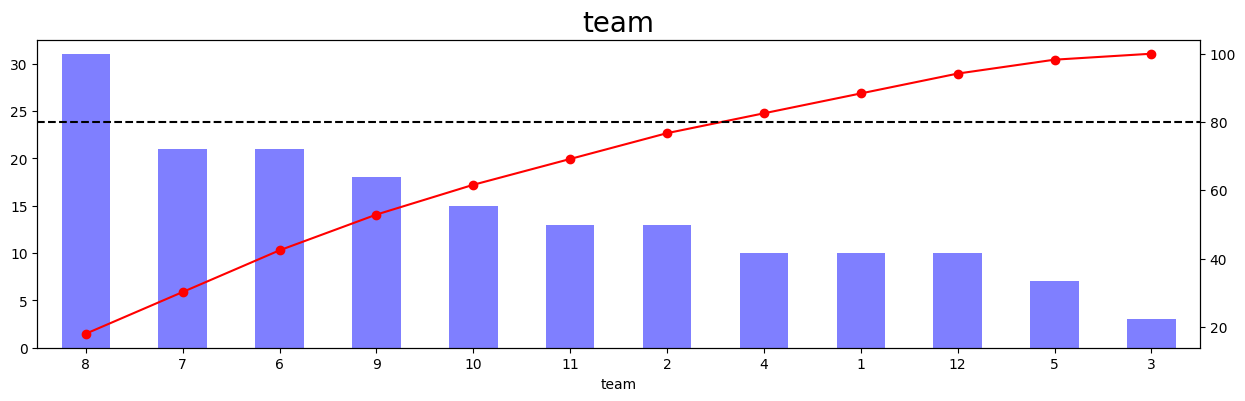

In [34]:
#Draw Bar Chart for Object Columns
data_cat = data_finishing_vu[['quarter','day', 'team']]
data_cat.head()

for column in data_cat:
    plt.figure(figsize=(15,4))
    
    # Calculate value counts and sort by descending order
    value_counts = data_cat[column].value_counts().sort_values(ascending=False)
    
    # Create bar chart
    value_counts.plot(kind='bar', color='blue', alpha=0.5)
    
    # Calculate cumulative sums and convert to percentage of total
    cumulative_sums = value_counts.cumsum() / value_counts.sum() * 100
    
    # Create Pareto line
    cumulative_sums.plot(kind='line', marker='o', color='red', secondary_y=True)

    # Add dotted line at 80%
    plt.axhline(y=80, color='k', linestyle='--')
    
    plt.title(column, fontdict={'fontsize': 20})
    plt.show()

From the bar chart, the "underperform" and "very underperform" condition for sewing department were:

1. 80% happen during Quarter 1 to 4, meaning almost in entire year, there will be tasks that is underperformed. 
2. Finishing department encounter underperformance in almost every day.
3. Team no 8, 7, and 6 were team that suffer underperformance the most.


In [35]:
#Draw Box Plot for Numeric Columns
data_num = data_finishing_vu[['team', 'targeted_productivity',
       'smv', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity']]

columns = ['over_time', 'smv']

teams_to_plot = [8,7,6]

for team in data_num['team'].unique():
    if team in teams_to_plot:
        team_data = data_num[data_num['team'] == team]
        fig = make_subplots(rows=len(columns), subplot_titles=columns)
        
        for i, column in enumerate(columns):
            fig.add_trace(go.Histogram(x=team_data[column], name=column, nbinsx=10), row=i+1, col=1)
        
        fig.update_layout(height=400*len(columns), width=1000, title_text=f'Distribution plots of team {team}')
        fig.show()

Based on the analysis,

<b>Team 8 has</b>:
- Consist of 31 tasks
- Often took over_time from 500-1490 minutes, and rarely has more than 2000 minutes
- The SMV mostly in range of 2.5 minutes to 3 minutes

Based on this, team 8 more likely need more workforce to reduce WIP for quick tasks accross the years and days.

<b>Team 7 has</b>:
- Consist of 21 tasks
- Often took over_time from 0-1990 minutes, and rarely has more than 3000 minutes
- The SMV mostly in range of 2.5 minutes to 3 minutes

Based on this, team 7 more likely need more workforce to reduce WIP for quick tasks accross the years and days.

<b>Team 6 has</b>:
- Consist of 21 tasks
- Always took over_time from 500-990 minutes, and sometimes has more than 1000 minutes
- The SMV mostly in range of 2 minutes to 3 minutes

Based on this, team 7 more likely need more workforce to reduce WIP for quick tasks accross the years and days.

Note: 
1. In total, there is about 172 out of 506 tasks showing underperformed tasks for finishing department, thus this analysis should be confirmed with PIC for each teams.


### 4. Predictive Analysis

For predictive analysis, we will use multiclass classification. The multiclass classification will be performed based on categorization of gap_category

4.1. Multiclass Classification for Sewing Department \
4.2. Multiclass Classification for Finishing Department

#### 4.1. Multiclass Classification for Sewing Department

In [36]:
data_sewing.head()

date   quarter department       day team  targeted_productivity  \
0 2015-01-01  Quarter1     sewing  Thursday    8                    0.8   
2 2015-01-01  Quarter1     sewing  Thursday   11                    0.8   
3 2015-01-01  Quarter1     sewing  Thursday   12                    0.8   
4 2015-01-01  Quarter1     sewing  Thursday    6                    0.8   
5 2015-01-01  Quarter1     sewing  Thursday    7                    0.8   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   
5  25.90   984.0       6720         38        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  gap_productivity  \
0                   0           59.0             0.940725          0.140725   
2                   0           30.5             0.800570          0.000570   
3                   0           30.5             0.800570          0.000570   
4                   0           56.0             0.800382          0.000382   
5                   0           56.0             0.800125          0.000125   

  gap_category  
0      Perform  
2    On Target  
3    On Target  
4    On Target  
5    On Target

In [37]:
data_sewing_prep = data_sewing[['targeted_productivity',
       'smv','no_of_workers','gap_category']]

X = data_sewing_prep.drop("gap_category", axis=1)
y = data_sewing_prep["gap_category"]

In [38]:
label_encoder = LabelEncoder()

# Fit and transform your categories
y = label_encoder.fit_transform(y)

print(label_encoder.classes_)

['On Target' 'Perform' 'Underperform']


In [39]:
scaler = MinMaxScaler(feature_range=(0,1))
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [40]:
rand_seed=123

# Initialize SMOTENC with the correct categorical features
smote_nc = SMOTE(random_state=rand_seed)

# Perform resampling
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    stratify=y_resampled, 
                                                    random_state=rand_seed)

In [41]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("sewing_dept")

<Experiment: artifact_location='mlflow-artifacts:/271351495791551388', creation_time=1698167398192, experiment_id='271351495791551388', last_update_time=1698167398192, lifecycle_stage='active', name='sewing_dept', tags={}>

In [42]:
# Define the models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "SVM": svm.SVC(kernel='linear', random_state=42)
}

In [43]:
def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    f1 = f1_score(actual, pred, average='macro')
    recall = recall_score(actual, pred, average='macro')
    precision = precision_score(actual, pred, average='macro')
    return accuracy, f1, recall, precision

/home/randi_eka/anaconda3/envs/huggingface/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning:

Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.

/home/randi_eka/anaconda3/envs/huggingface/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning:

Setuptools is replacing distutils.

/home/randi_eka/anaconda3/envs/huggingface/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning:

Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils dire

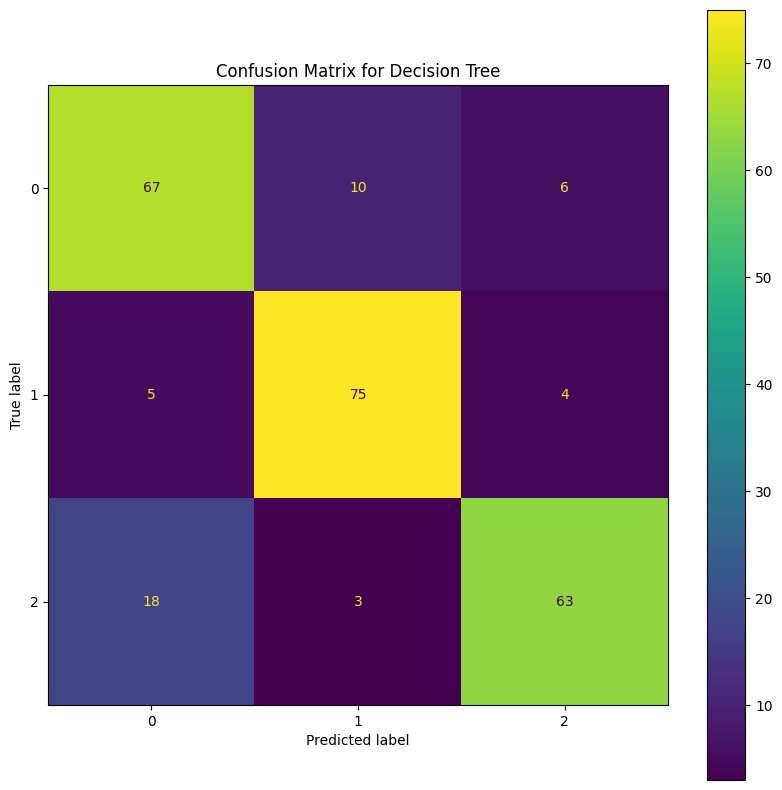

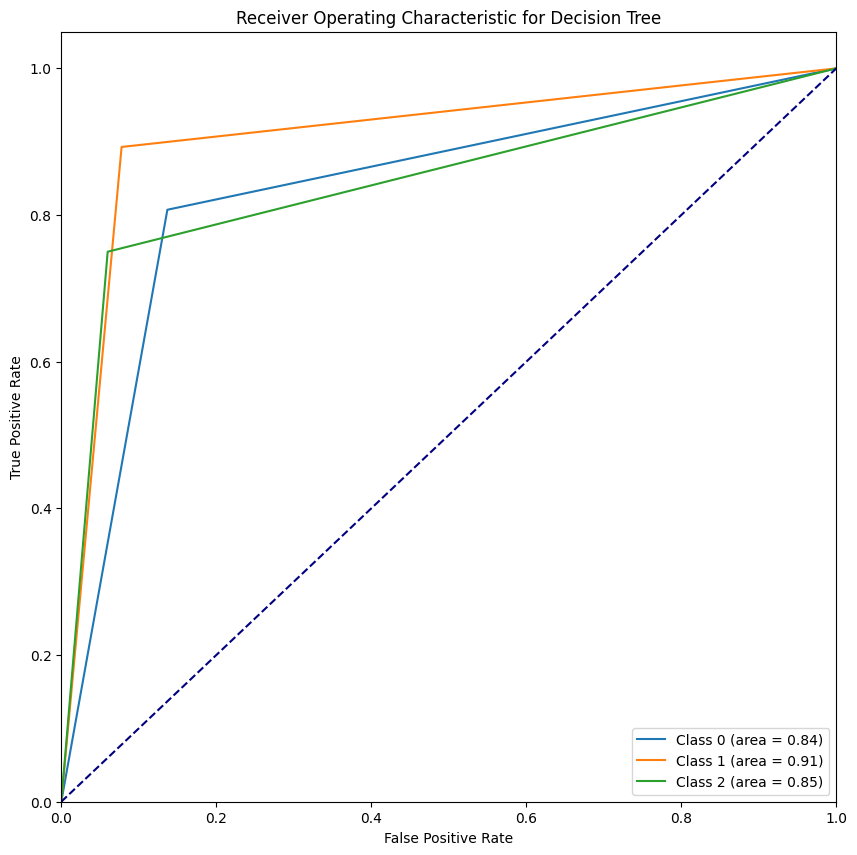

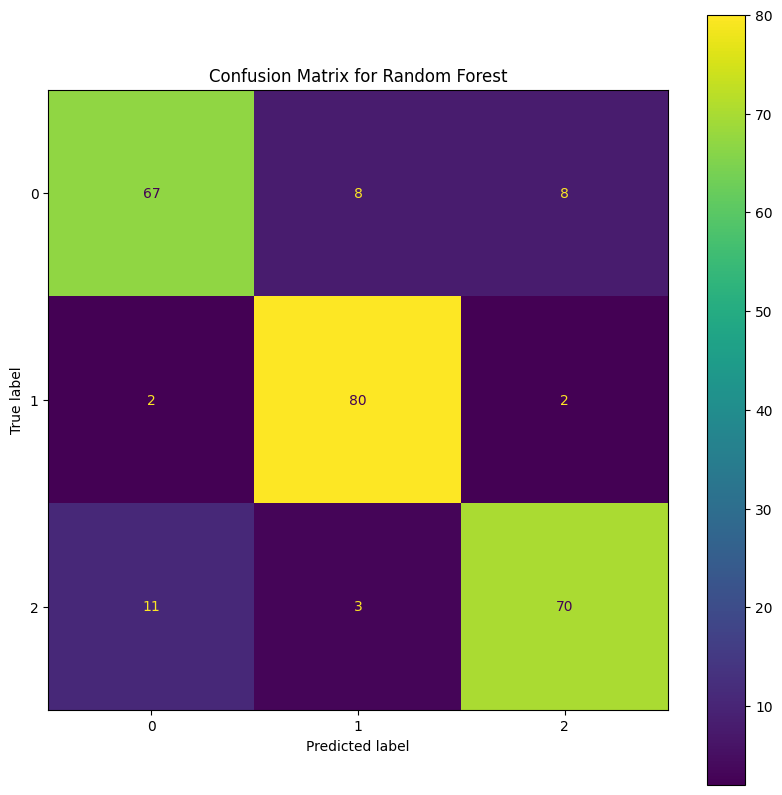

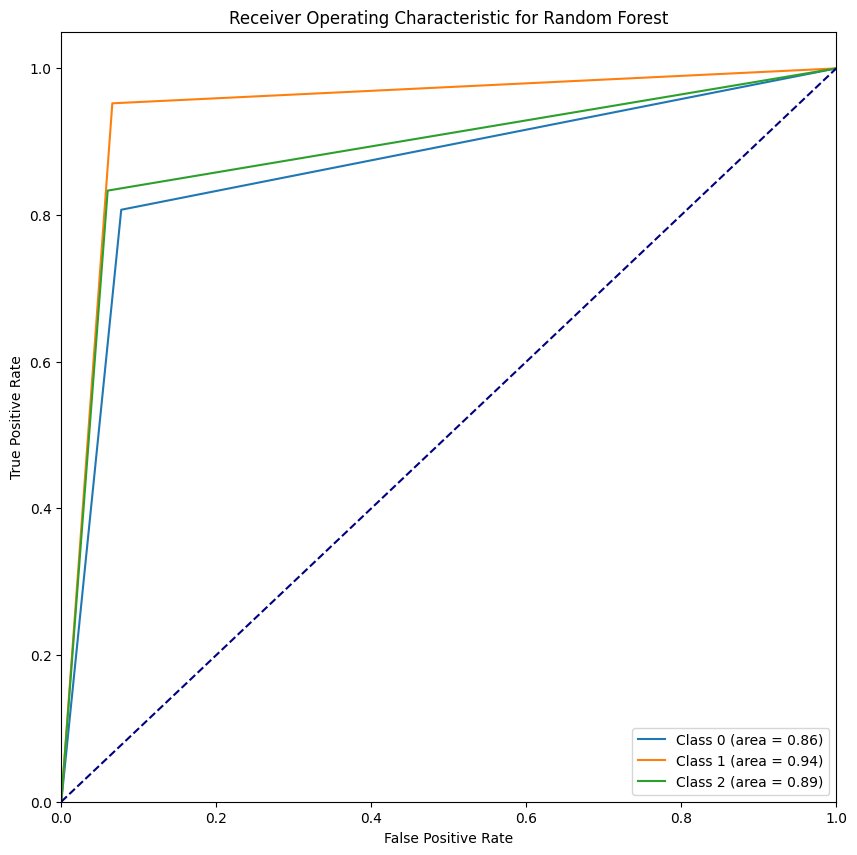

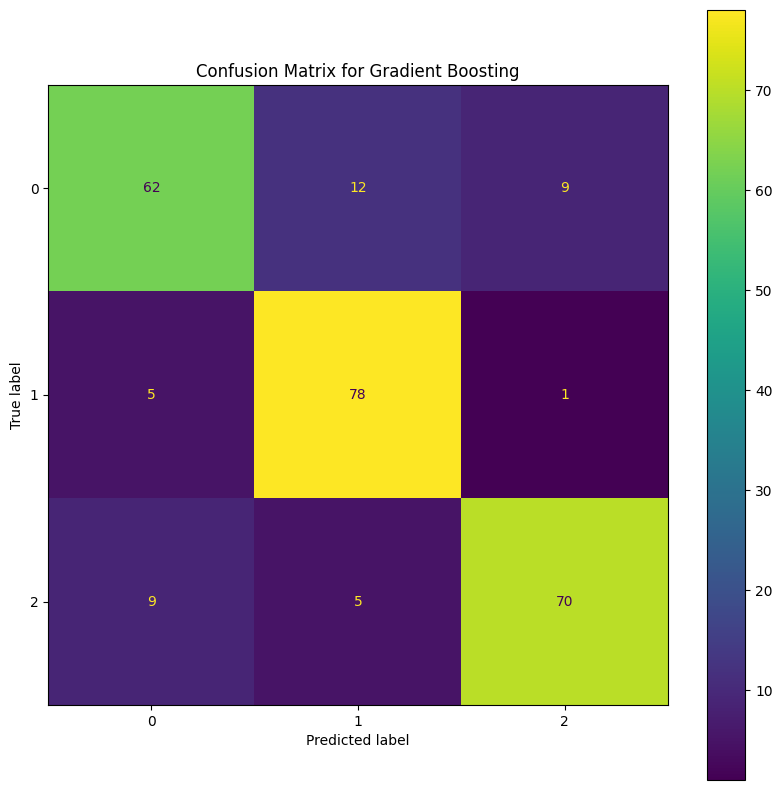

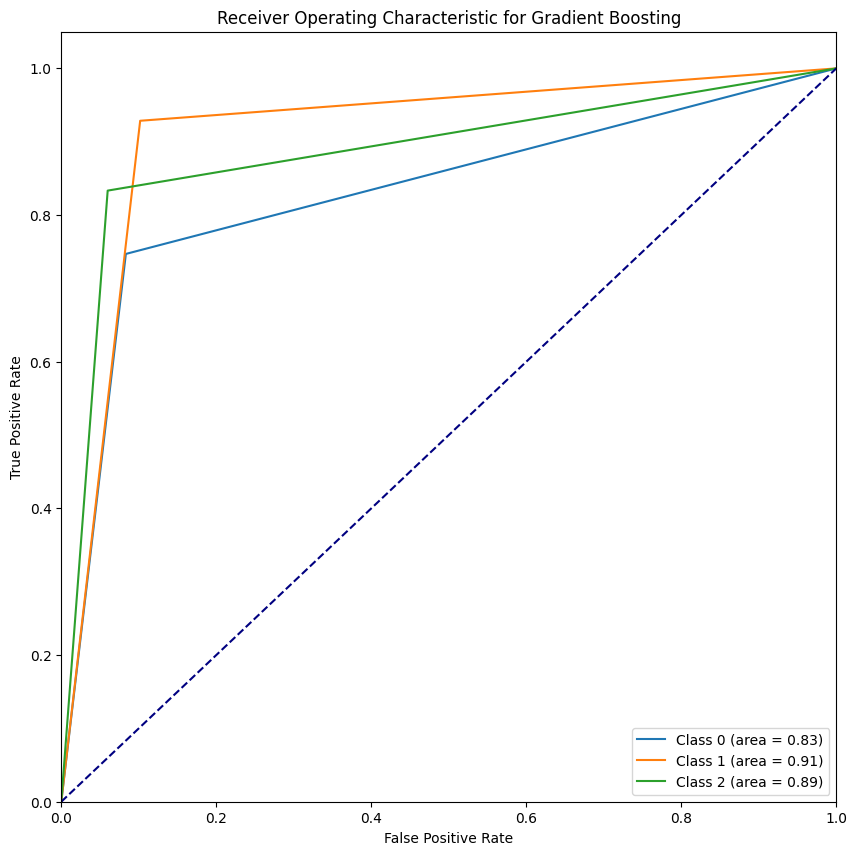

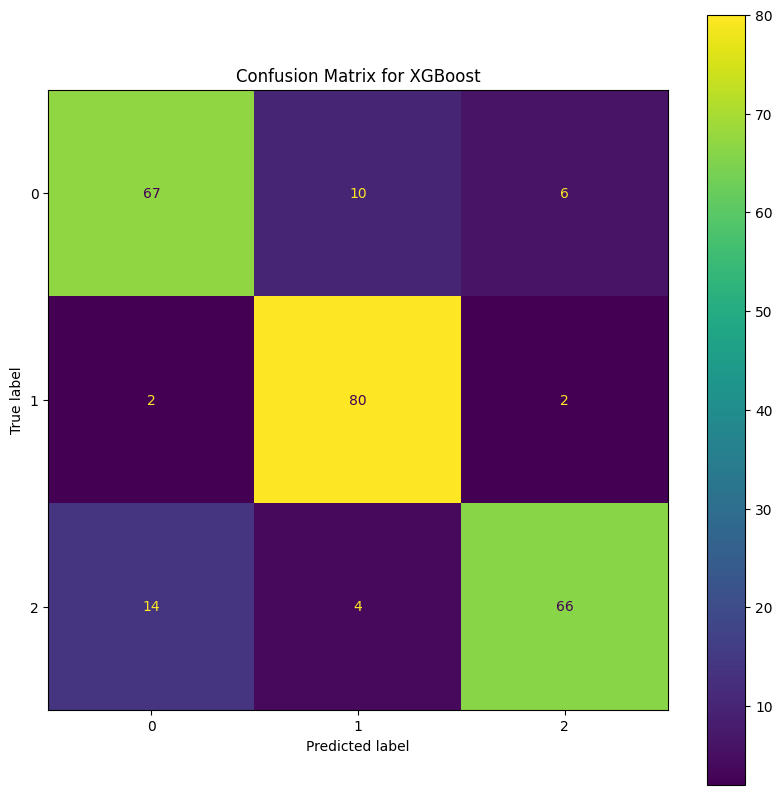

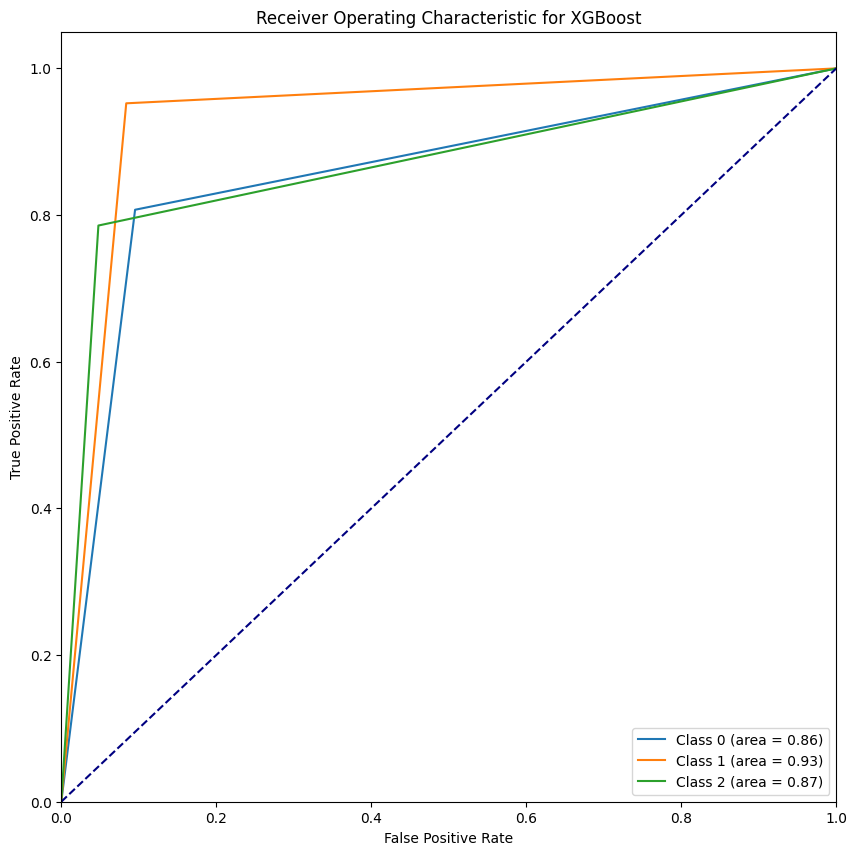

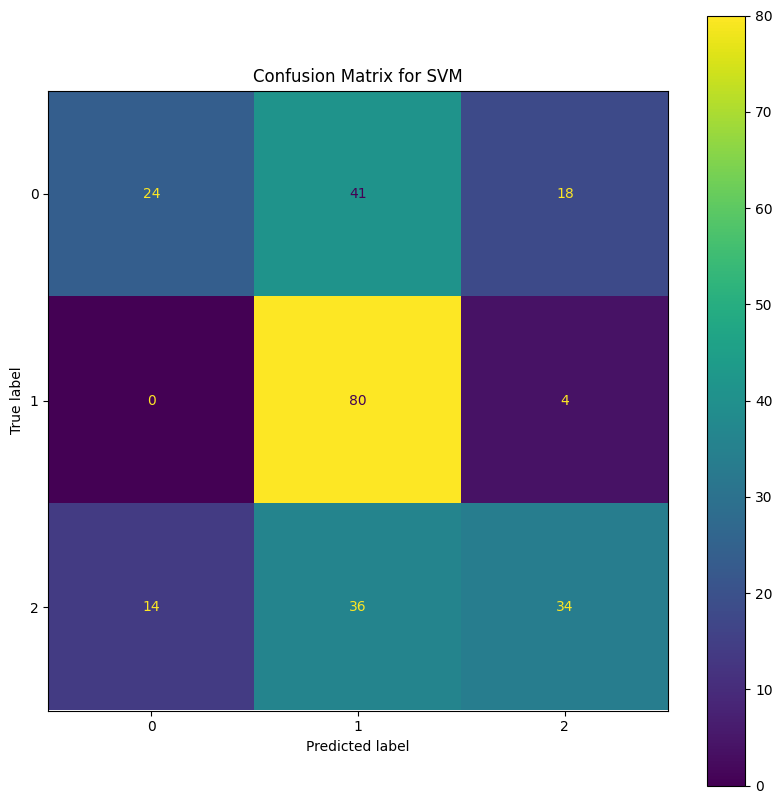

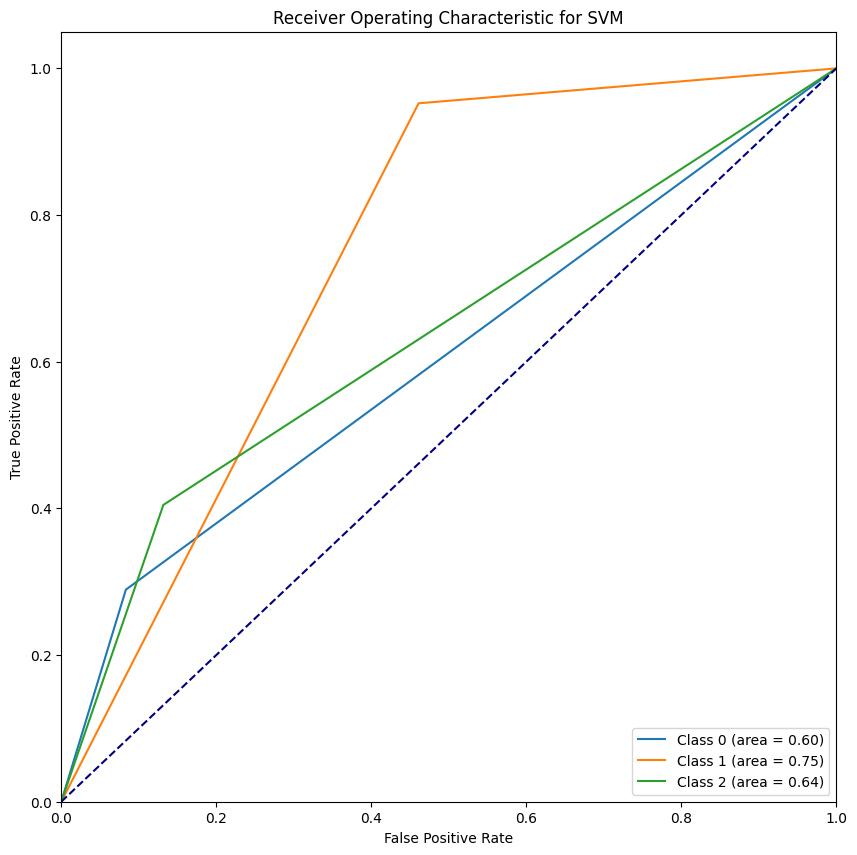

In [44]:
# Compare models
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name + " default"):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Compute metrics
        (accuracy, f1, recall, precision) = eval_metrics(y_test, y_pred)
        
        # Compute AUC-ROC for multiclass
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        y_pred_bin = label_binarize(y_pred, classes=np.unique(y))
        roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovo')

        # Log metrics into MLflow
        mlflow.log_metric("Accuracy", accuracy)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("F1 Score", f1)
        mlflow.log_metric("roc_auc", roc_auc)
        
        # Log parameters
        params = model.get_params()
        mlflow.log_params(params)
        
        # Log data information as tags
        mlflow.set_tag("num_features", X_train.shape[1])
        mlflow.set_tag("num_samples", X_train.shape[0])
        
        # Log a sample of the data
        sample_rows = 5
        sample_data = pd.DataFrame(X_train[:sample_rows], 
                                   columns=X.columns).assign(
                                       target=y_train[:sample_rows])
        mlflow.log_text(sample_data.to_csv(index=False), "sample_data.csv")
        
        # Log the model
        if isinstance(model, XGBClassifier):
            mlflow.xgboost.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model")

        # Plot and save confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots(figsize=(10, 10))
        ConfusionMatrixDisplay(cm).plot(ax=ax)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.savefig(f"UTS/Graph/{model_name}_confusion_matrix.png")
        
        # Plot and save ROC curve
        fig, ax = plt.subplots(figsize=(10, 10))
        
        for i in range(len(np.unique(y))):
             fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
             ax.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')
            
        ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'Receiver Operating Characteristic for {model_name}')
        ax.legend(loc="lower right")
        
        plt.savefig(f"UTS/Graph/{model_name}_roc_curve.png")
        
        # Log plots as artifacts
        #mlflow.log_artifact(f"{model_name}_confusion_matrix.png")
        mlflow.log_artifact(f"UTS/Graph/{model_name}_roc_curve.png")


In [45]:
#### Train a Random Forest classifier

#### Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'random_state': [42]
}

#### Create a base model
rf = RandomForestClassifier(random_state=rand_seed)

#### Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

#### Fit the grid search to the data
grid_search.fit(X_train, y_train)

#### Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

Fitting 3 folds for each of 270 candidates, totalling 810 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=42; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=

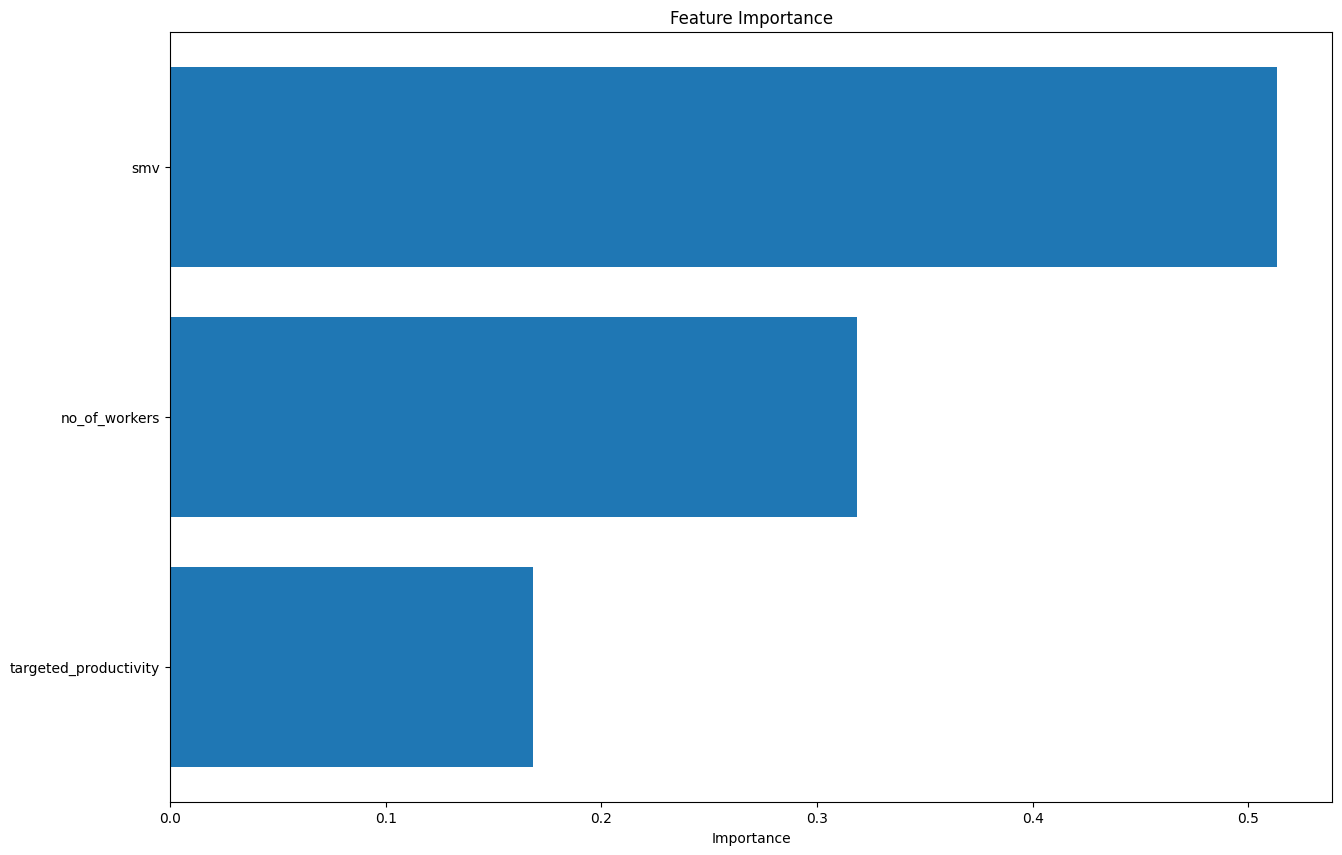

Accuracy: 0.8645418326693227
F1 Score: 0.8633433801472107
Recall: 0.8643144004589788
Precision: 0.8638736263736263


Registered model 'sewing_rf_finetuned' already exists. Creating a new version of this model...
2023/10/26 21:58:30 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: sewing_rf_finetuned, version 6
Created version '6' of model 'sewing_rf_finetuned'.


In [46]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    with mlflow.start_run(run_name="Random Forest finetuned"):
        clf = RandomForestClassifier(random_state=42)#**best_params)
        clf.fit(X_train, y_train)

        # Feature Importance Visualization
        feature_importance = clf.feature_importances_
        feature_names = np.array(X.columns)

        # Sort features by importance
        sorted_idx = np.argsort(feature_importance)

        # Create a horizontal bar plot
        plt.figure(figsize=(15,10))
        plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
        plt.xlabel('Importance')
        plt.title('Feature Importance')

        # Save the figure as a PNG
        if not os.path.exists("images"):
            os.mkdir("images")

        plt.savefig("UTS/Graph/feature_importance.png")
        plt.show()

        # Test Random Forest Classification Model
        y_pred = clf.predict(X_test)

        (accuracy, f1, recall, precision) = eval_metrics(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Recall: {recall}")
        print(f"Precision: {precision}")

        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1 score", f1)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("precision", precision)
        #mlflow.log_artifact("feature_importance.json")
        mlflow.log_artifact("UTS/Graph/feature_importance.png")

        predictions = clf.predict(X_train)
        signature = infer_signature(X_train, predictions)
        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            mlflow.sklearn.log_model(clf, "model", 
                                     registered_model_name="sewing_rf_finetuned", 
                                     signature=signature)
        else:
            mlflow.sklearn.log_model(clf, "model", signature=signature)

    

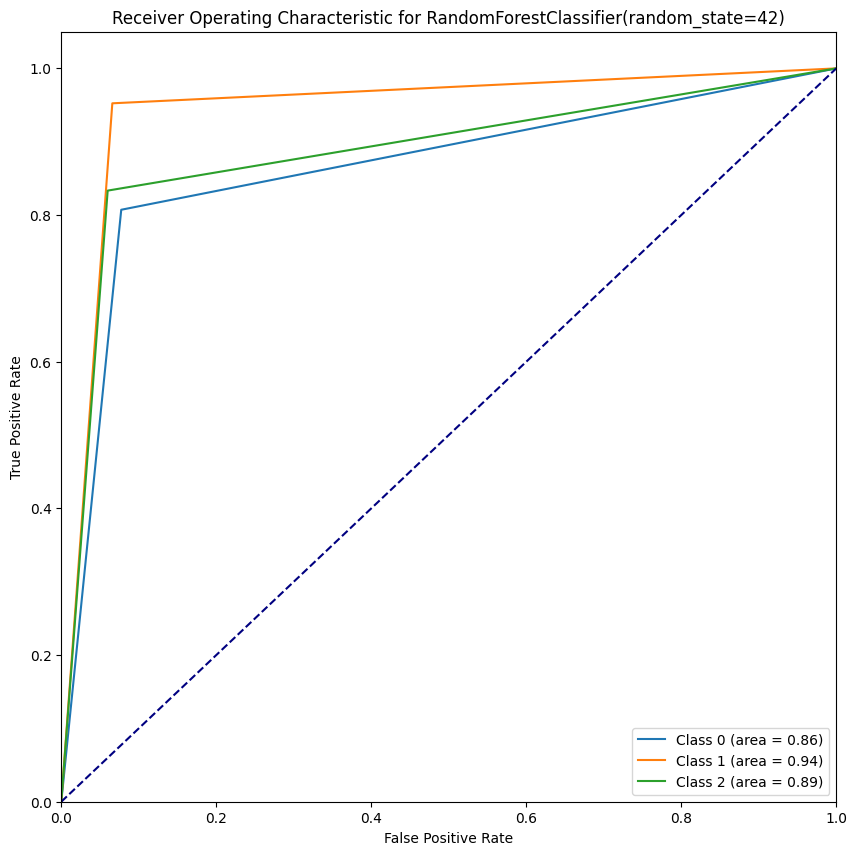

In [47]:
# Compute AUC-ROC for multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y))
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovo')

# Plot and save ROC curve
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        ax.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')
    
ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title(f'Receiver Operating Characteristic for {clf}')
ax.legend(loc="lower right")

Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Finetuned')

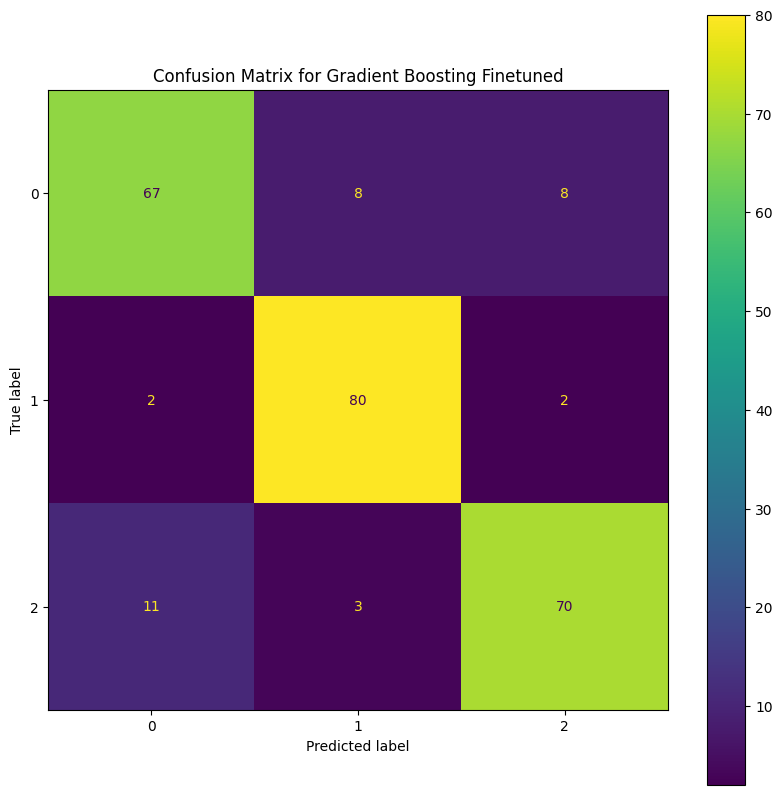

In [48]:
# Plot and save confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(cm).plot(ax=ax)
plt.title(f'Confusion Matrix for {"Gradient Boosting Finetuned"}')

In [49]:
y_df = pd.Series(y_resampled, name="target")
df = pd.concat([X_resampled,y_df], axis=1)
df = df.groupby("target")
df.describe()

targeted_productivity                                          \
                       count      mean       std       min       25%   
target                                                                 
0                      418.0  0.893000  0.139141  0.383562  0.863014   
1                      418.0  0.928662  0.118823  0.000000  0.863014   
2                      418.0  0.852685  0.134794  0.383562  0.794521   

                                   smv                                \
             50%       75%  max  count      mean       std       min   
target                                                                 
0       0.931507  1.000000  1.0  418.0  0.270144  0.160026  0.000000   
1       1.000000  1.000000  1.0  418.0  0.309557  0.065231  0.030555   
2       0.863014  0.984704  1.0  418.0  0.385663  0.208795  0.030555   

                                               no_of_workers            \
             25%       50%       75%       max         count      mean   
target                                                                   
0       0.117052  0.277466  0.428443  0.917547         418.0  0.385623   
1       0.280162  0.280162  0.361941  0.450461         418.0  0.494342   
2       0.241698  0.319254  0.450461  1.000000         418.0  0.435145   

                                                                    
             std       min       25%       50%       75%       max  
target                                                              
0       0.168513  0.000000  0.190476  0.484127  0.507937  0.539683  
1       0.051132  0.079365  0.484127  0.492063  0.507937  1.000000  
2       0.117142  0.071429  0.424813  0.484127  0.507937  0.539683

#### 4.2. Model Interpretation for Sewing Department

Lets learn about how to interpret the metrics

1 - Accuracy is suitable with balanced dataset when there are an equal number of observations in each class which isn’t common in real-life problems.

2 - Precision is important when the cost of false positives is high.

3 - Recall is important when the cost of false negatives is high.

4 - F1 score considers both the precision and recall.

Based on training and hyperparameter tunning process, Random Forest is the best model which produce highest metrics accross the board. As this case were about predicting which task will have potential of underperform, I propose we look up for several set of metrics including precision and ROC AUC score for "Underperform" class which has been encoded with "2" or "class 2".

Using base model, the best model is achieved using Random Forest Classification. Later, hyperparameter tuning is used to optimize the model but in result, giving lower result compared to the base model. Thus, here are the detail of best model metrics:

* Precision (Average) : 0.8638736263736263
* ROC AUC Score (Underperform Class) : 0.89

Moreover, when we look up the feature importance, SMV become the most important feature to reduce the impurity of the prediction, or i should say, contribute the most on making sure the prediction is correct. Further inspection is performed on upsampled data to know the statistics properties of SMV, especially regarding the Underperform class ("2"). It shows that <b>when the sewing tasks need more time to finish compared to others, it will likely be underperformed</b>.

#### 4.3. Multiclass Classification for Finishing Department

In [50]:
data_finishing.head()

date   quarter department       day team  targeted_productivity  \
1  2015-01-01  Quarter1  finishing  Thursday    1                   0.75   
6  2015-01-01  Quarter1  finishing  Thursday    2                   0.75   
13 2015-01-01  Quarter1  finishing  Thursday   10                   0.65   
14 2015-01-01  Quarter1  finishing  Thursday    8                   0.75   
15 2015-01-01  Quarter1  finishing  Thursday    4                   0.75   

     smv  wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
1   3.94  NaN        960          0        0.0         0                   0   
6   3.94  NaN        960          0        0.0         0                   0   
13  3.94  NaN        960          0        0.0         0                   0   
14  2.90  NaN        960          0        0.0         0                   0   
15  3.94  NaN       2160          0        0.0         0                   0   

    no_of_workers  actual_productivity  gap_productivity  gap_category  
1             8.0             0.886500          0.136500       Perform  
6             8.0             0.755167          0.005167     On Target  
13            8.0             0.705917          0.055917       Perform  
14            8.0             0.676667         -0.073333  Underperform  
15           18.0             0.593056         -0.156944  Underperform

In [51]:
data_finishing_prep = data_finishing[['targeted_productivity',
       'smv','no_of_workers','gap_category']]

X = data_finishing_prep.drop("gap_category", axis=1)
y = data_finishing_prep["gap_category"]

In [52]:
label_encoder_finishing = LabelEncoder()

# Fit and transform your categories
y = label_encoder_finishing.fit_transform(y)

print(label_encoder_finishing.classes_)

['On Target' 'Perform' 'Underperform']


In [53]:
scaler = MinMaxScaler(feature_range=(0,1))
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [54]:
rand_seed=123

# Initialize SMOTENC with the correct categorical features
smote_nc = SMOTE(random_state=rand_seed)

# Perform resampling
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    stratify=y_resampled, 
                                                    random_state=rand_seed)

In [55]:
mlflow.set_experiment("finishing_dept")

<Experiment: artifact_location='mlflow-artifacts:/389154152907867015', creation_time=1698204699717, experiment_id='389154152907867015', last_update_time=1698204699717, lifecycle_stage='active', name='finishing_dept', tags={}>

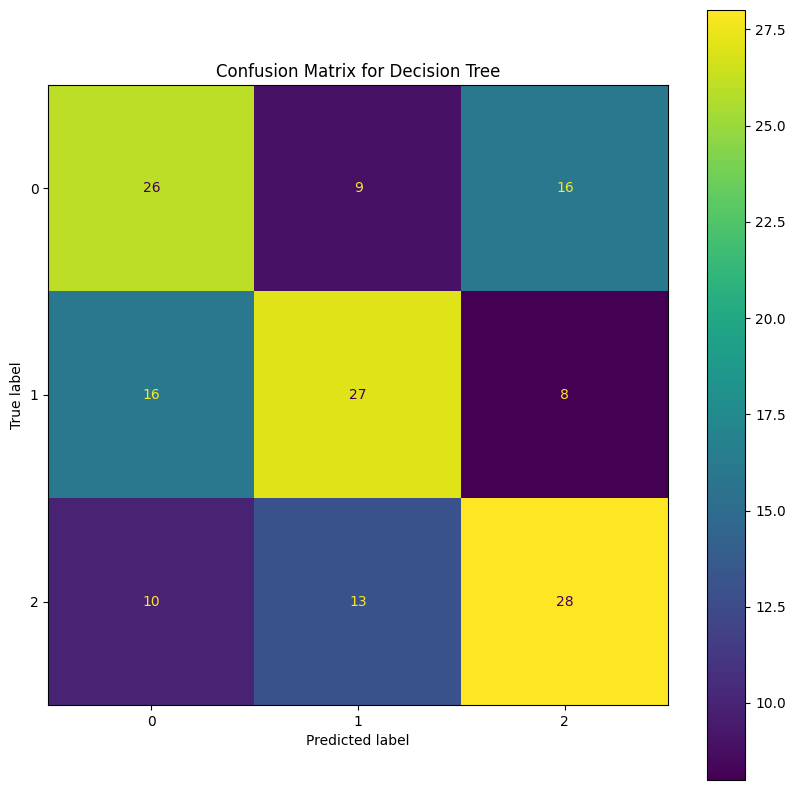

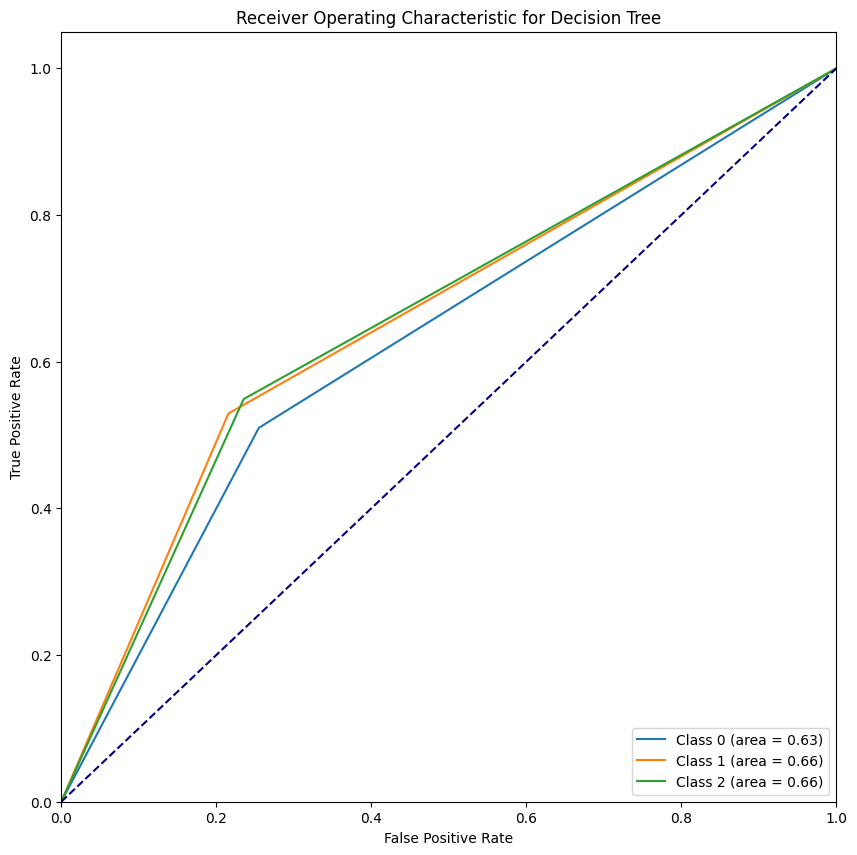

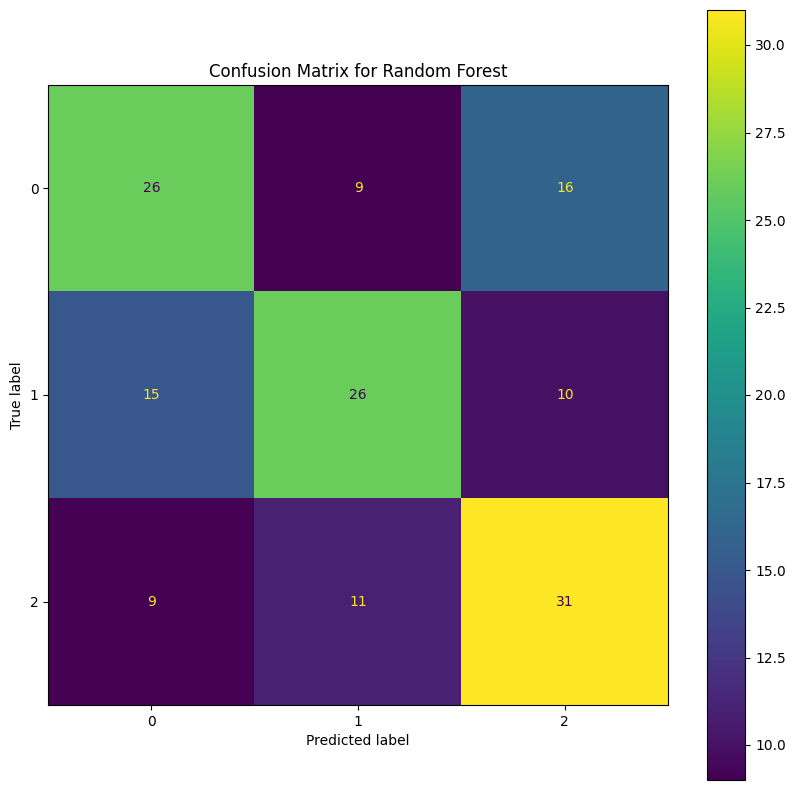

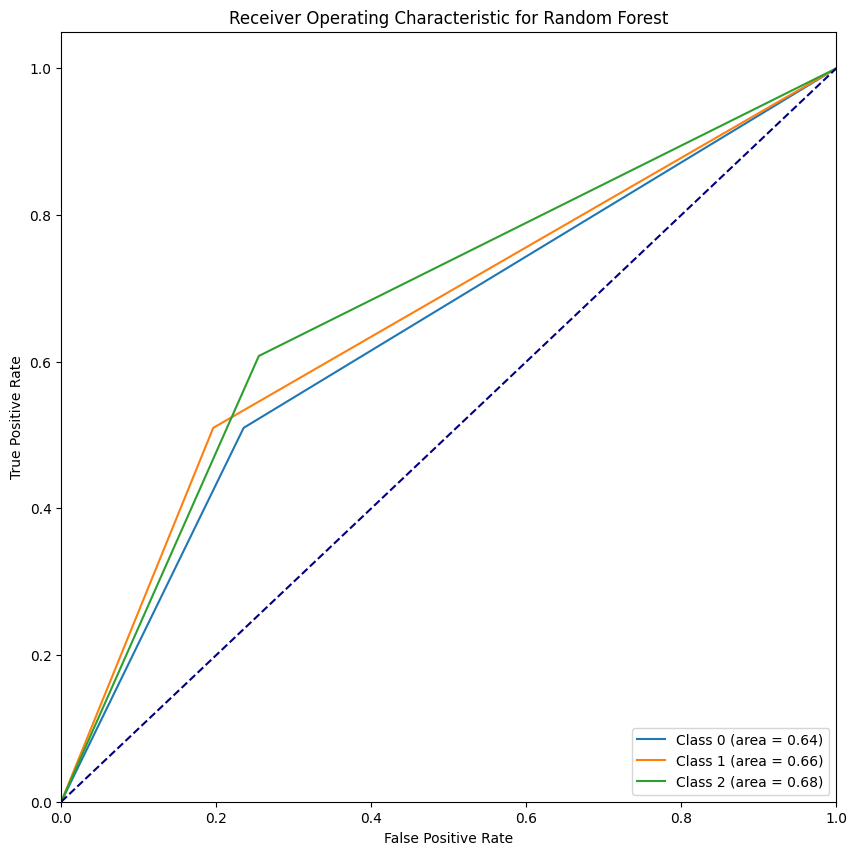

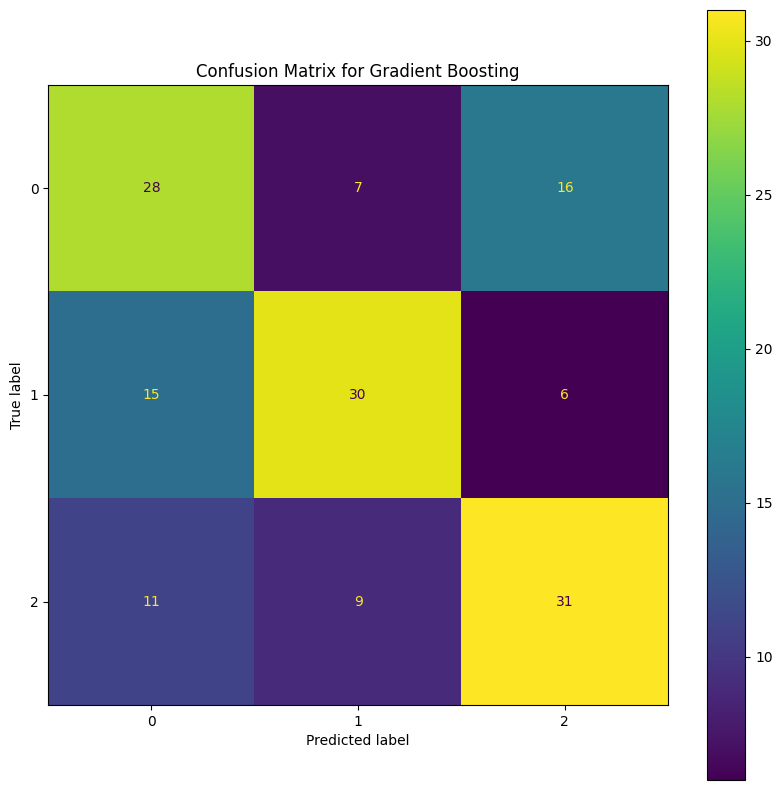

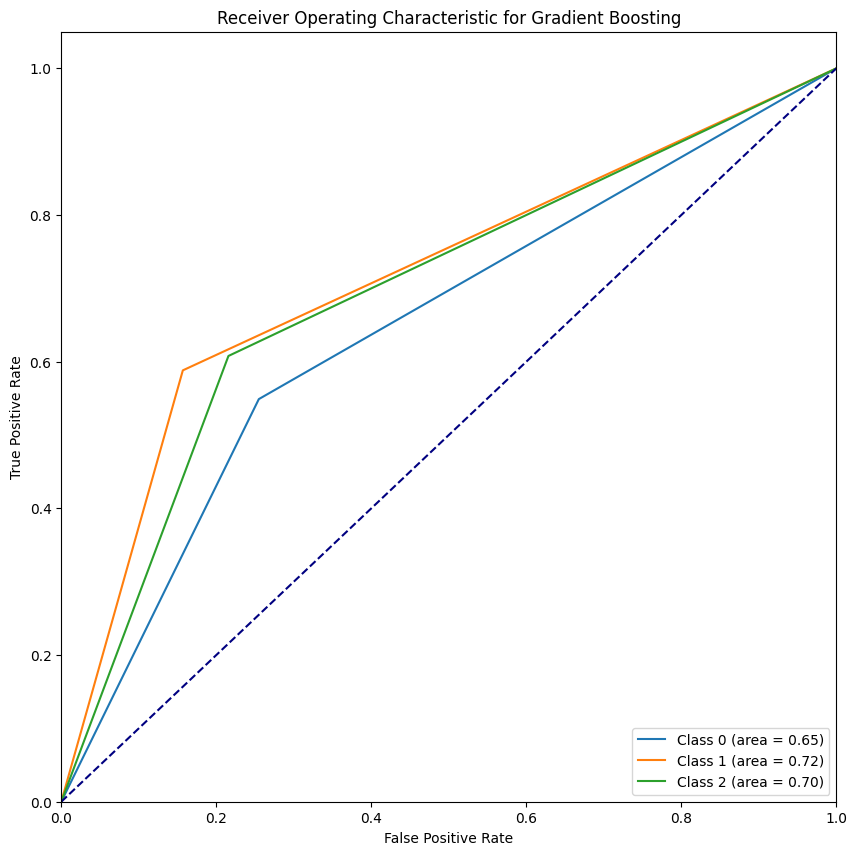

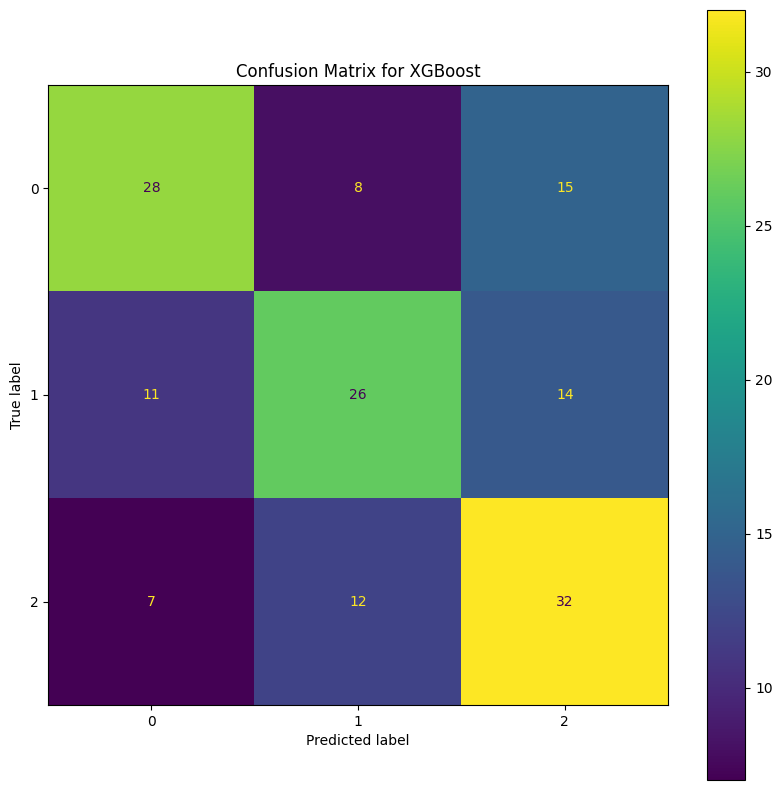

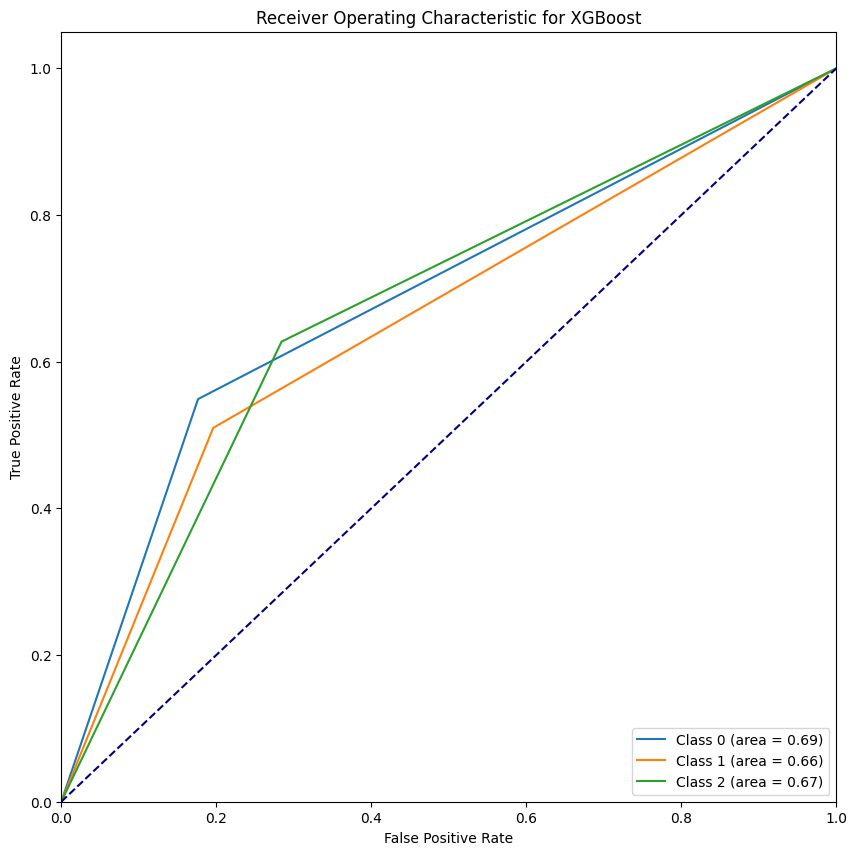

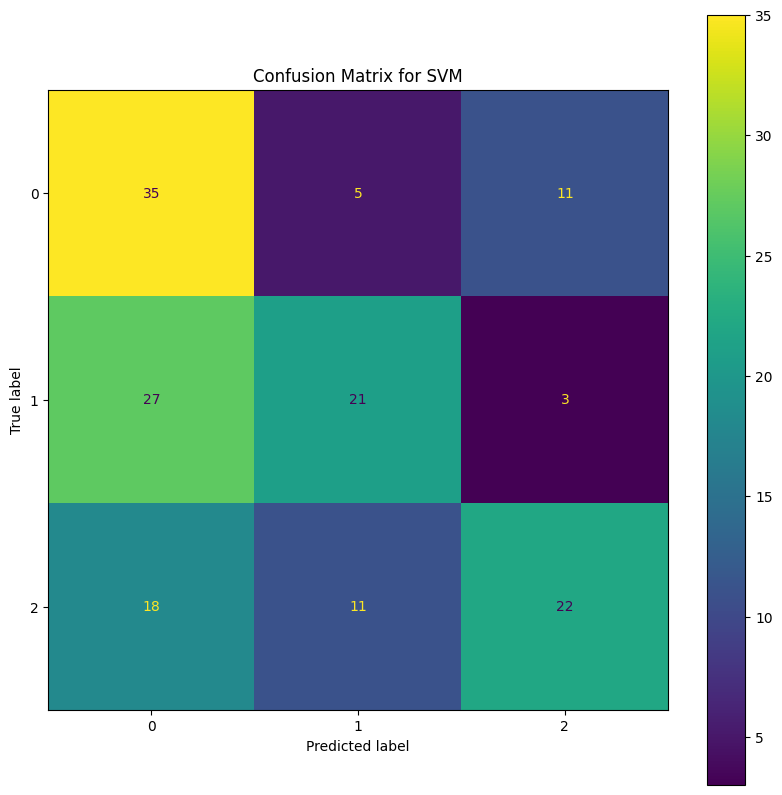

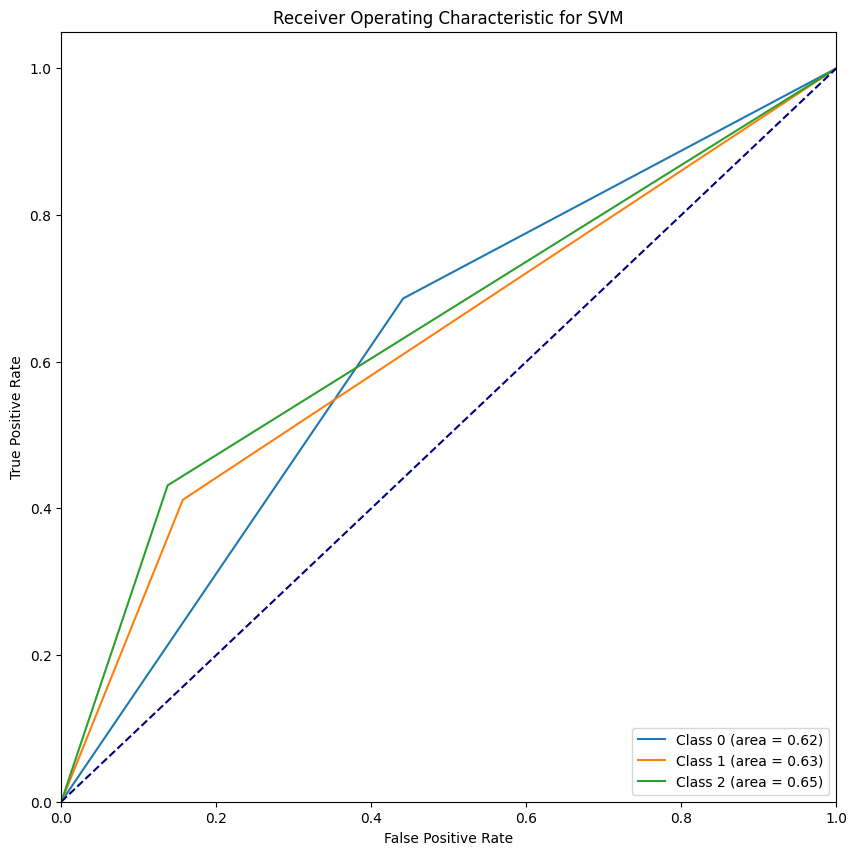

In [56]:
# Compare models
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name + " default"):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        
        # Compute AUC-ROC for multiclass
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        y_pred_bin = label_binarize(y_pred, classes=np.unique(y))
        roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovo')

        # Log metrics into MLflow
        mlflow.log_metric("Accuracy", accuracy)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("F1 Score", f1)
        mlflow.log_metric("roc_auc", roc_auc)
        
        # Log parameters
        params = model.get_params()
        mlflow.log_params(params)
        
        # Log data information as tags
        mlflow.set_tag("num_features", X_train.shape[1])
        mlflow.set_tag("num_samples", X_train.shape[0])
        
        # Log a sample of the data
        sample_rows = 5
        sample_data = pd.DataFrame(X_train[:sample_rows], 
                                   columns=X.columns).assign(
                                       target=y_train[:sample_rows])
        mlflow.log_text(sample_data.to_csv(index=False), "sample_data.csv")
        
        # Log the model
        if isinstance(model, XGBClassifier):
            mlflow.xgboost.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model")

        # Plot and save confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots(figsize=(10, 10))
        ConfusionMatrixDisplay(cm).plot(ax=ax)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.savefig(f"UTS/Graph/{model_name}_confusion_matrix.png")
        
        # Plot and save ROC curve
        fig, ax = plt.subplots(figsize=(10, 10))
        for i in range(len(np.unique(y))):
             fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
             ax.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')
            
        ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'Receiver Operating Characteristic for {model_name}')
        ax.legend(loc="lower right")
        plt.savefig(f"UTS/Graph/{model_name}_roc_curve.png")
        # Log plots as artifacts
        mlflow.log_artifact(f"UTS/Graph/{model_name}_roc_curve.png")

In [57]:
#### Train a Gradient Boosted classifier

#### Define the parameter grid
param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [200, 300, 400],
    'max_depth': [3],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [3, 4, 5],
    'validation_fraction':[0.2],
    'random_state': [42],
    'max_features': ['sqrt', 'log2']
}

#### Create a base model
gb = GradientBoostingClassifier(random_state=rand_seed)

#### Instantiate the grid search model
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

#### Fit the grid search to the data
grid_search.fit(X_train, y_train)

#### Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=200, random_state=42, validation_fraction=0.2; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200, random_state=42, validation_fraction=0.2; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=20, n_estimators=200, random_state=42, validation_fraction=0.2; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200, random_state=42, validation_fraction=0.2; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=200, random_state=42, validation_fraction=0.2; total time=   0.7s
[CV] END learning_rate=0.01,

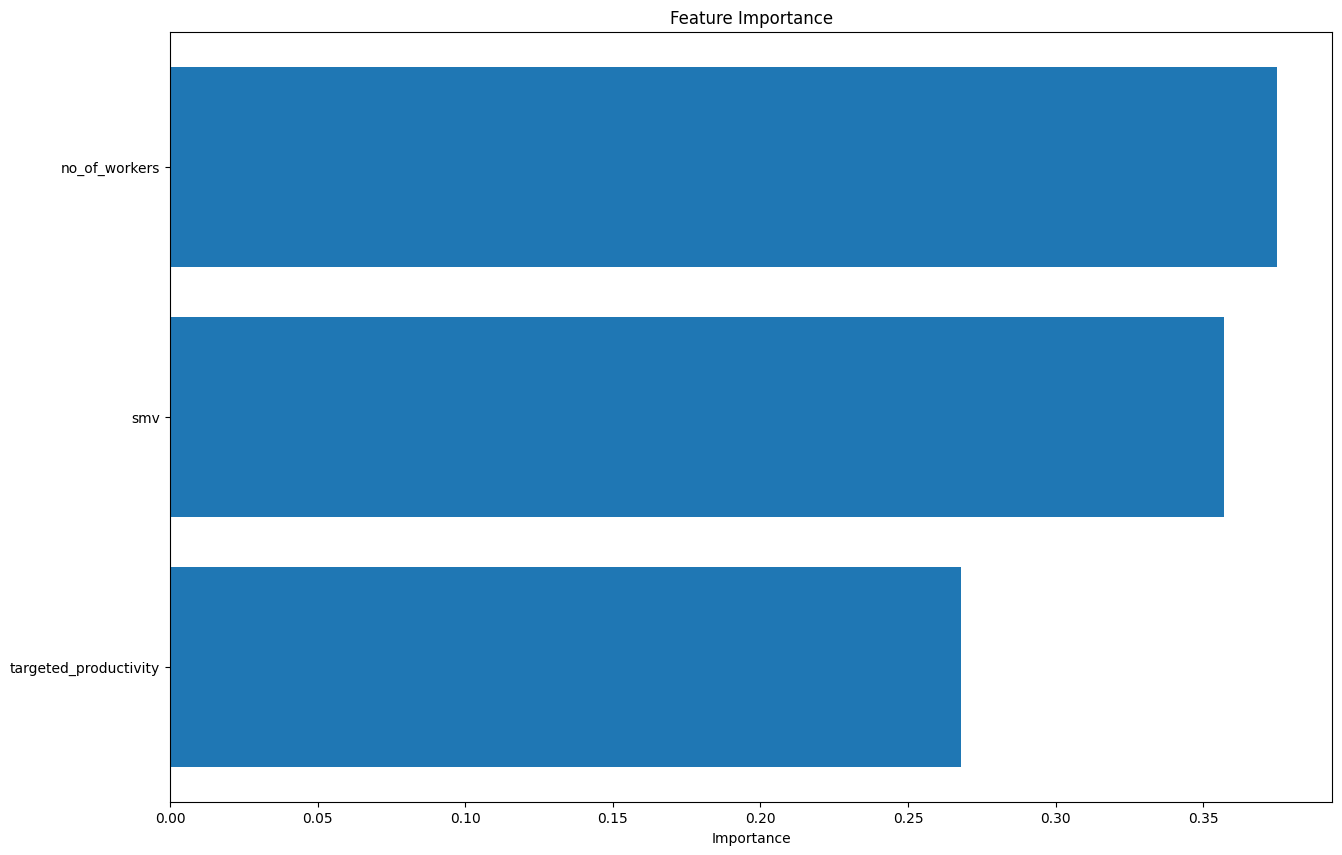

Accuracy: 0.5882352941176471
F1 Score: 0.5886369362559839
Recall: 0.5882352941176471
Precision: 0.5910419412259118


Registered model 'finishing_gbt_finetuned' already exists. Creating a new version of this model...
2023/10/26 21:58:53 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: finishing_gbt_finetuned, version 8
Created version '8' of model 'finishing_gbt_finetuned'.


In [58]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    with mlflow.start_run(run_name="Gradient Boosting finetuned"):
        clf = GradientBoostingClassifier(**best_params)
        clf.fit(X_train, y_train)

        # Feature Importance Visualization
        # Assuming clf is your trained model and feature_names is the list of feature names
        feature_importance = clf.feature_importances_
        feature_names = np.array(X.columns)

        # Sort features by importance
        sorted_idx = np.argsort(feature_importance)

        # Create a horizontal bar plot
        plt.figure(figsize=(15,10))
        plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
        plt.xlabel('Importance')
        plt.title('Feature Importance')

        # Save the figure as a PNG
        if not os.path.exists("images"):
            os.mkdir("images")

        plt.savefig("UTS/Graph/feature_importance.png")
        plt.show()

        # Test Random Forest Classification Model
        y_pred = clf.predict(X_test)

        (accuracy, f1, recall, precision) = eval_metrics(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Recall: {recall}")
        print(f"Precision: {precision}")

        mlflow.log_metric("Accuracy", accuracy)
        mlflow.log_metric("F1 Score", f1)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("Precision", precision)
        #mlflow.log_artifact("feature_importance.json")
        mlflow.log_artifact("UTS/Graph/feature_importance.png")

        predictions = clf.predict(X_train)
        signature = infer_signature(X_train, predictions)
        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            mlflow.sklearn.log_model(clf, "model", 
                                     registered_model_name="finishing_gbt_finetuned", 
                                     signature=signature)
        else:
            mlflow.sklearn.log_model(clf, "model", signature=signature)

    

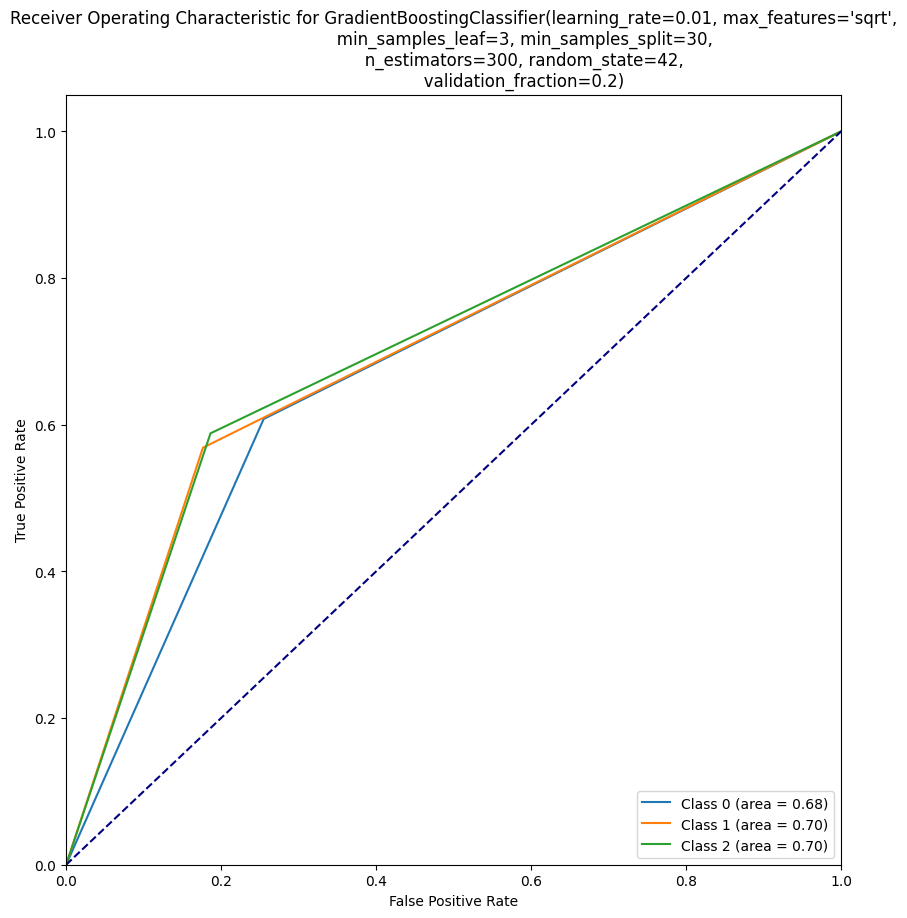

In [59]:
# Compute AUC-ROC for multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y))
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovo')

# Plot and save ROC curve
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        ax.plot(fpr, tpr, label=f'Class {i} (area = {auc(fpr, tpr):.2f})')
    
ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title(f'Receiver Operating Characteristic for {clf}')
ax.legend(loc="lower right")

Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Finetuned')

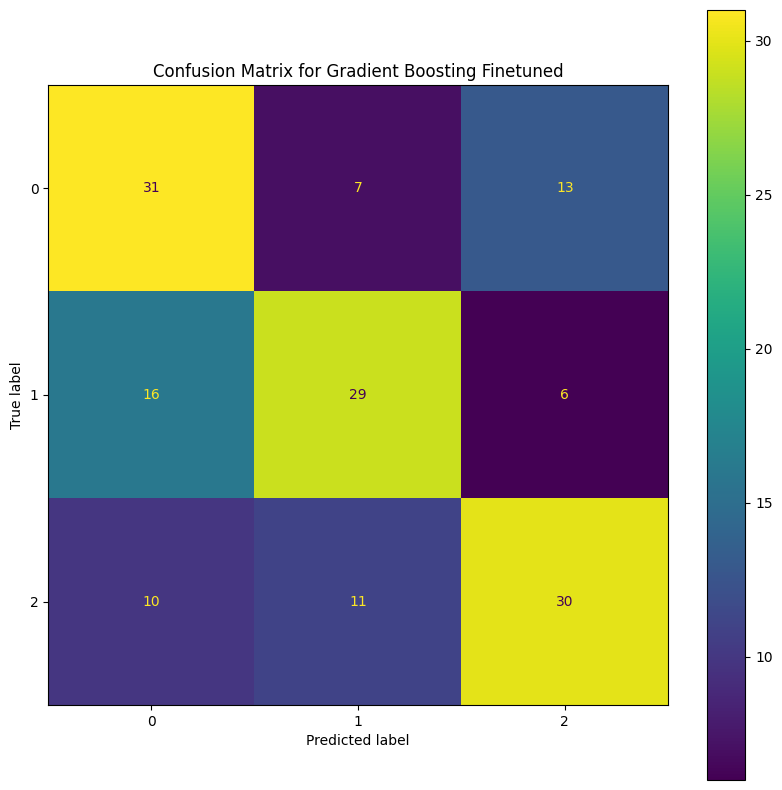

In [60]:
# Plot and save confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay(cm).plot(ax=ax)
plt.title(f'Confusion Matrix for {"Gradient Boosting Finetuned"}')

In [61]:
y_df = pd.Series(y_resampled, name="target")
df = pd.concat([X_resampled,y_df], axis=1)
df = df.groupby("target")
df.describe()

targeted_productivity                                          \
                       count      mean       std       min       25%   
target                                                                 
0                      254.0  0.923831  0.103557  0.333333  0.888889   
1                      254.0  0.825459  0.246799  0.000000  0.777778   
2                      254.0  0.882973  0.148542  0.333333  0.777778   

                              smv                                     \
             50%  75%  max  count      mean       std  min       25%   
target                                                                 
0       1.000000  1.0  1.0  254.0  0.453889  0.261368  0.0  0.461204   
1       0.888889  1.0  1.0  254.0  0.500477  0.203449  0.0  0.466368   
2       0.999104  1.0  1.0  254.0  0.340348  0.316401  0.0  0.000000   

                                no_of_workers                           \
             50%       75%  max         count      mean       std  min   
target                                                                   
0       0.466368  0.560538  1.0         254.0  0.288514  0.113979  0.0   
1       0.466368  0.560538  1.0         254.0  0.355694  0.171450  0.0   
2       0.466368  0.560538  1.0         254.0  0.264728  0.107366  0.0   

                                                
             25%       50%       75%       max  
target                                          
0       0.230769  0.230769  0.305420  0.884615  
1       0.230769  0.307692  0.490385  1.000000  
2       0.230769  0.230769  0.230769  0.884615

#### 4.4. Model Interpretation for Finishing Department

Lets learn about how to interpret the metrics

1 - Accuracy is suitable with balanced dataset when there are an equal number of observations in each class which isn’t common in real-life problems.

2 - Precision is important when the cost of false positives is high.

3 - Recall is important when the cost of false negatives is high.

4 - F1 score considers both the precision and recall.

Based on training and hyperparameter tunning process, Gradient Boosting is the best model which produce highest metrics accross the board. As this case were about predicting which task will have potential of underperform, I propose we look up for several set of metrics including precision and ROC AUC score for "Underperform" class which has been encoded with "2" or "class 2".

Using base model, the best model is achieved using Gradient Boosting Classification. Later, hyperparameter tuning is used to optimize the model. Thus, here are the detail of best model metrics:

* Precision (Average) : 0.5910419412259118
* ROC AUC Score (Underperform Class) : 0.70

Moreover, when we look up the feature importance, number of worker and SMV were similar to reduce the impurity of the prediction, or i should say, contribute the most on making sure the prediction is correct. Further inspection is performed on upsampled data to know the statistics properties of number of worker and SMV, especially regarding the Underperform class ("2"). It shows that <b>when the finishing tasks having relatively low number of worker and need less time to finish compared to others, it will likely be underperformed</b>.